# Montaje Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Librerías

## Instalación de Librerías

In [2]:
!pip install scikeras

In [ ]:
#!pip install keras==2.12.0
#!pip uninstall tensorflow
#!pip install tensorflow==2.12.0

In [ ]:
#!pip uninstall tensorflow
#!pip install tensorflow --ignore-installed

## Importación de Librerías

In [5]:
import pandas as pd
import numpy as np
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing
#import mglearn
#import talib
from sklearn.model_selection import train_test_split
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
import tensorflow as tf
#from skkeras import KerasClassifier
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.constraints import MaxNorm
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import VarianceThreshold
from tensorflow.keras.utils import plot_model
from tensorflow.keras.optimizers import SGD
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_score, recall_score, auc,roc_curve, roc_auc_score
from sklearn.metrics import f1_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.inspection import permutation_importance

# Datos

## Importación de Datos

In [6]:
ruta = '/content/drive/MyDrive/TOG/IDI III/Datos/'
df = pd.read_excel(ruta+"datos_klines.xlsx")

Visualización de 'data'

In [24]:
df.head()

,Open_time,Open,High,Low,Close,Volume,Close_time,Quote_asset_volume,Number_of_trades,Taker_buy_base_asset_volume,Taker_buy_quote_asset_volume,Ignore,Response
0,1672534800000,1193.53,1195.73,1193.41,1195.38,2738.3979,1672538399999,3.271612e+06,3308,1254.0049,1.498065e+06,0,1
1,1672538400000,1195.38,1196.10,1193.51,1194.86,2429.3965,1672541999999,2.902240e+06,3194,979.2334,1.169702e+06,0,0
2,1672542000000,1194.85,1194.85,1191.21,1193.47,5148.8046,1672545599999,6.141005e+06,4962,1744.5012,2.080476e+06,0,0
3,1672545600000,1193.47,1193.47,1190.22,1192.34,4333.7378,1672549199999,5.165866e+06,4161,1664.9285,1.984479e+06,0,0
4,1672549200000,1192.34,1193.99,1192.25,1193.87,1544.9423,1672552799999,1.843229e+06,2125,731.0198,8.721530e+05,0,1


In [25]:
df.columns = ['Open_time','Open','High','Low','Close',
                'Volume','Close_time','Quote_asset_volume',
                'Number_of_trades','Taker_buy_base_asset_volume',
                'Taker_buy_quote_asset_volume','Ignore','Response']

Información de 'data'

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7294 entries, 0 to 7293
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Open_time                     7294 non-null   int64  
 1   Open                          7294 non-null   float64
 2   High                          7294 non-null   float64
 3   Low                           7294 non-null   float64
 4   Close                         7294 non-null   float64
 5   Volume                        7294 non-null   float64
 6   Close_time                    7294 non-null   int64  
 7   Quote_asset_volume            7294 non-null   float64
 8   Number_of_trades              7294 non-null   int64  
 9   Taker_buy_base_asset_volume   7294 non-null   float64
 10  Taker_buy_quote_asset_volume  7294 non-null   float64
 11  Ignore                        7294 non-null   int64  
 12  Response                      7294 non-null   int64  
dtypes: 

## Conversión 'unix'

In [27]:
df['Open_time'] = pd.to_datetime(df['Open_time'], unit='ms', origin='unix')
df['Close_time'] = pd.to_datetime(df['Close_time'], unit='ms',origin='unix')

In [28]:
df.head()

,Open_time,Open,High,Low,Close,Volume,Close_time,Quote_asset_volume,Number_of_trades,Taker_buy_base_asset_volume,Taker_buy_quote_asset_volume,Ignore,Response
0,2023-01-01 01:00:00,1193.53,1195.73,1193.41,1195.38,2738.3979,2023-01-01 01:59:59.999,3.271612e+06,3308,1254.0049,1.498065e+06,0,1
1,2023-01-01 02:00:00,1195.38,1196.10,1193.51,1194.86,2429.3965,2023-01-01 02:59:59.999,2.902240e+06,3194,979.2334,1.169702e+06,0,0
2,2023-01-01 03:00:00,1194.85,1194.85,1191.21,1193.47,5148.8046,2023-01-01 03:59:59.999,6.141005e+06,4962,1744.5012,2.080476e+06,0,0
3,2023-01-01 04:00:00,1193.47,1193.47,1190.22,1192.34,4333.7378,2023-01-01 04:59:59.999,5.165866e+06,4161,1664.9285,1.984479e+06,0,0
4,2023-01-01 05:00:00,1192.34,1193.99,1192.25,1193.87,1544.9423,2023-01-01 05:59:59.999,1.843229e+06,2125,731.0198,8.721530e+05,0,1


## Análisis Exploratorio

Definición de los parámetros de los gráficos

In [16]:
plt.rcParams.update({'font.size': 11, 'figure.figsize': (20, 13)})
plt.style.use('ggplot')

### ¿Cómo están distribuidos los datos?

array([[<Axes: title={'center': 'Open_time'}>,
        <Axes: title={'center': 'Open'}>,
        <Axes: title={'center': 'High'}>,
        <Axes: title={'center': 'Low'}>],
       [<Axes: title={'center': 'Close'}>,
        <Axes: title={'center': 'Volume'}>,
        <Axes: title={'center': 'Close_time'}>,
        <Axes: title={'center': 'Quote_asset_volume'}>],
       [<Axes: title={'center': 'Number_of_trades'}>,
        <Axes: title={'center': 'Taker_buy_base_asset_volume'}>,
        <Axes: title={'center': 'Taker_buy_quote_asset_volume'}>,
        <Axes: title={'center': 'Ignore'}>],
       [<Axes: title={'center': 'Response'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

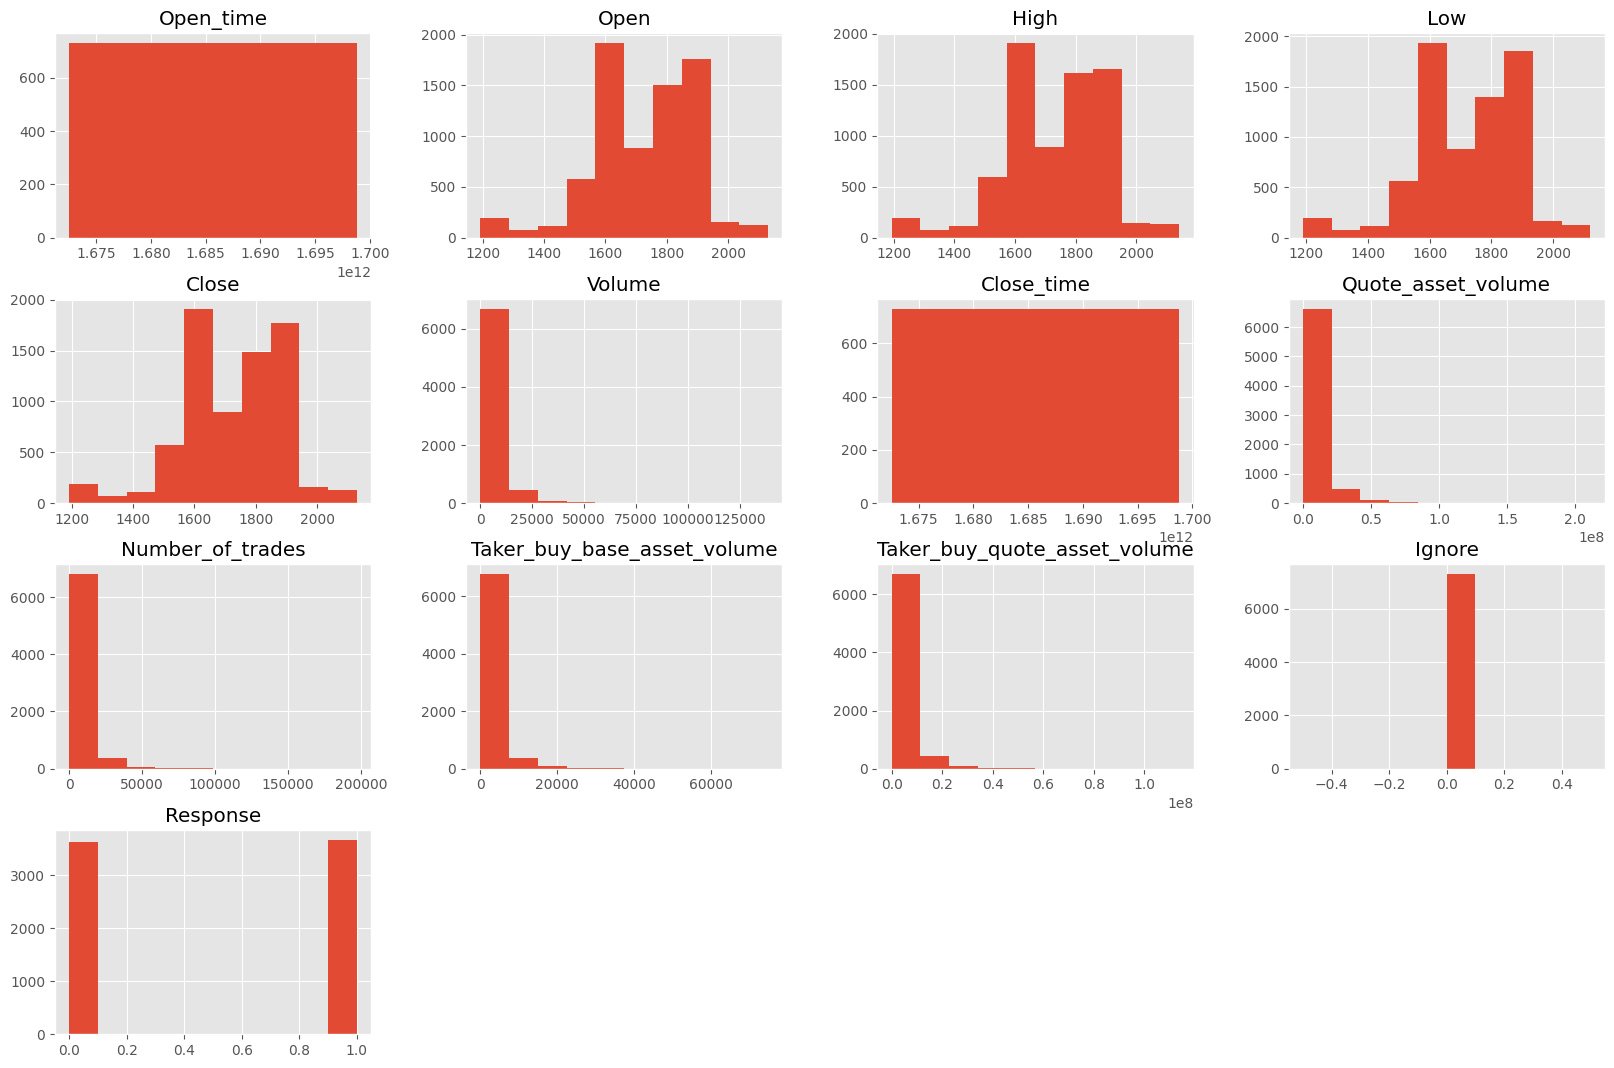

In [17]:
df.hist()

Con la información que se tiene hasta el momento podemos determinar lo siguiente:
- 'Open_time' y 'Close_time' se comportan de la misma manera como pudiera esperarse ya que únicamente son "timestamps"
- 'Open' y 'Close',siendo valores de precio de apertura y cierre por hora, comparten la misma figura de su distribución. Esto es debido a que el precio de Cierre en la hora t será el mismo precio que el de apertura en el tiempo t+1
- Las distribuciones de 'High' y 'Low' son bastante parecidas pero se alcanza a percibir una diferencia alrededor de los valores de 1800 en el eje x
- 3 distribuciones son bastante similares (a simple vista no se encuentran diferencias significativas) 'Number of trades', 'Taker buy base asset volume', 'taker buy quote asset volume'
- La variable 'Ignore' siempre se encuentra en los mismos valores
- La variable de respuesta (subida o bajada de precio) presenta frecuencias similares

### Simetría y Curtosis

In [31]:
df.skew()

<ipython-input-31-9e0b1e29546f>:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.skew()


Open                           -0.624179
High                           -0.626043
Low                            -0.618232
Close                          -0.622225
Volume                          4.708800
Quote_asset_volume              4.493413
Number_of_trades                4.832944
Taker_buy_base_asset_volume     4.760273
Taker_buy_quote_asset_volume    4.527951
Ignore                          0.000000
Response                       -0.009873
dtype: float64

In [32]:
df.kurt()

<ipython-input-32-8bd0d54cd88d>:1: FutureWarning: The default value of numeric_only in DataFrame.kurt is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.kurt()


Open                             0.725154
High                             0.754403
Low                              0.683988
Close                            0.721330
Volume                          36.078795
Quote_asset_volume              32.755534
Number_of_trades                44.204848
Taker_buy_base_asset_volume     37.809828
Taker_buy_quote_asset_volume    34.043795
Ignore                           0.000000
Response                        -2.000451
dtype: float64

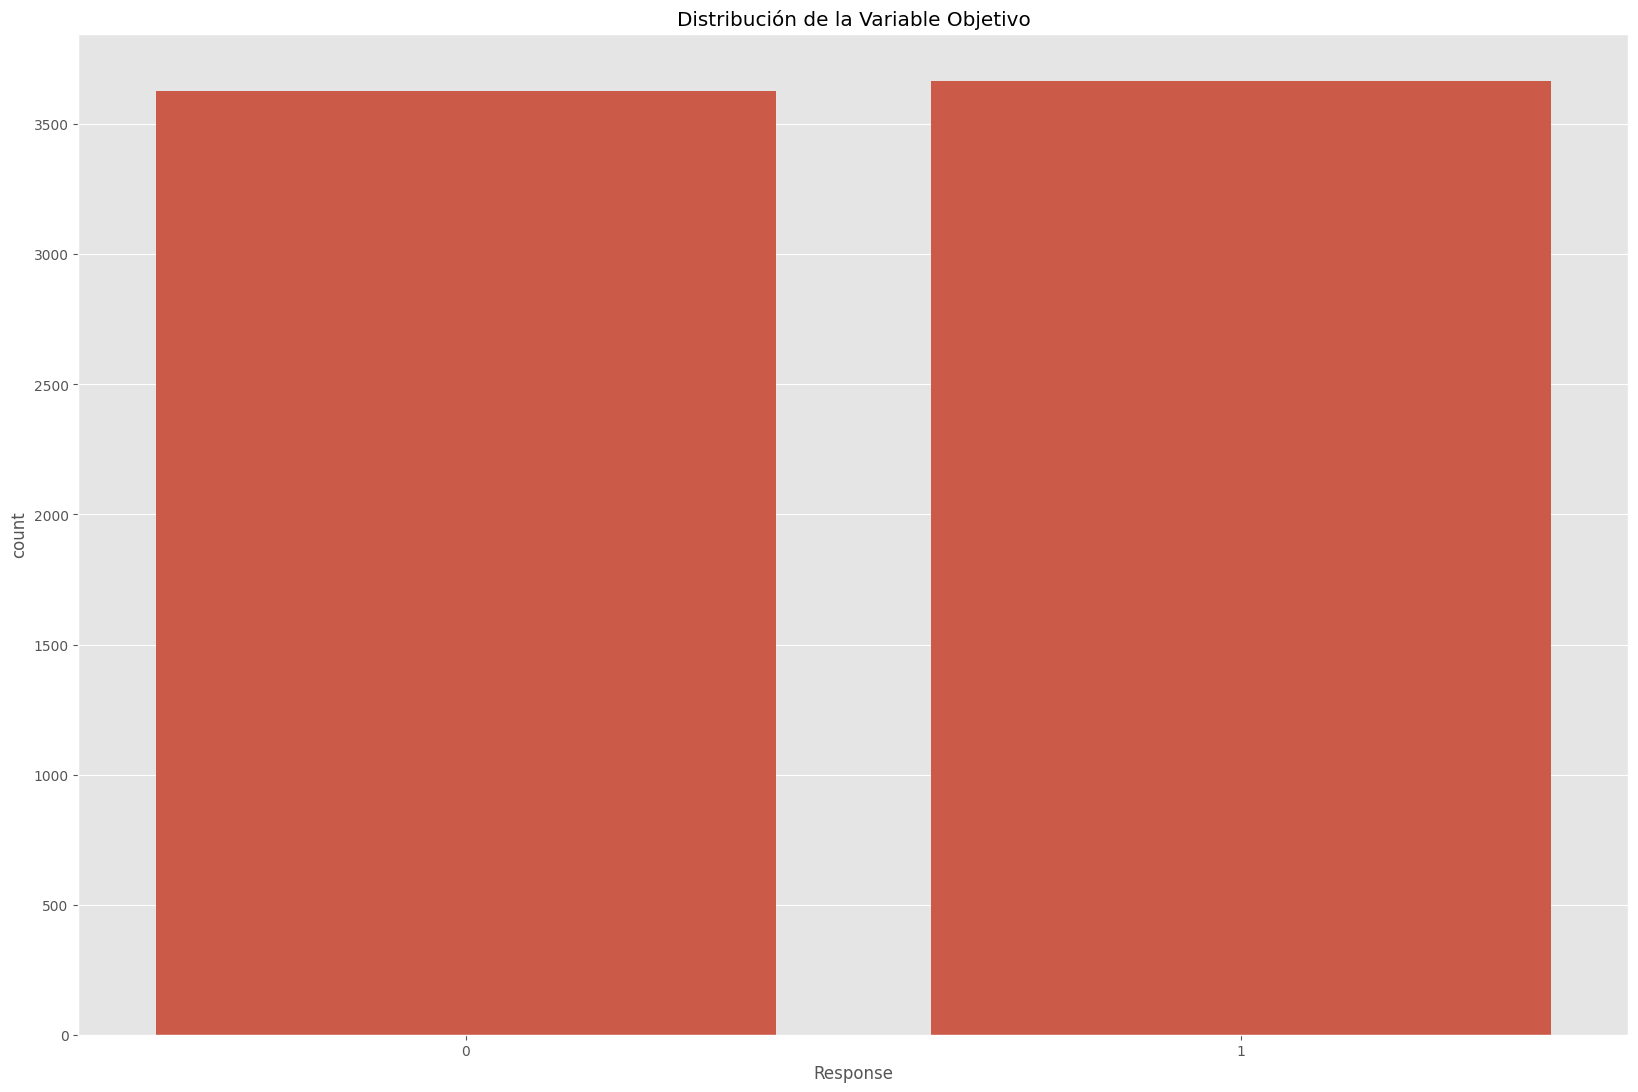

In [33]:
sns.countplot(x='Response', data=df)
plt.title('Distribución de la Variable Objetivo')
plt.show()

Se puede visualizar variables altamente correlacionadas entre sí.

¿Cómo se comporta el precio de apertura a lo largo del tiempo?

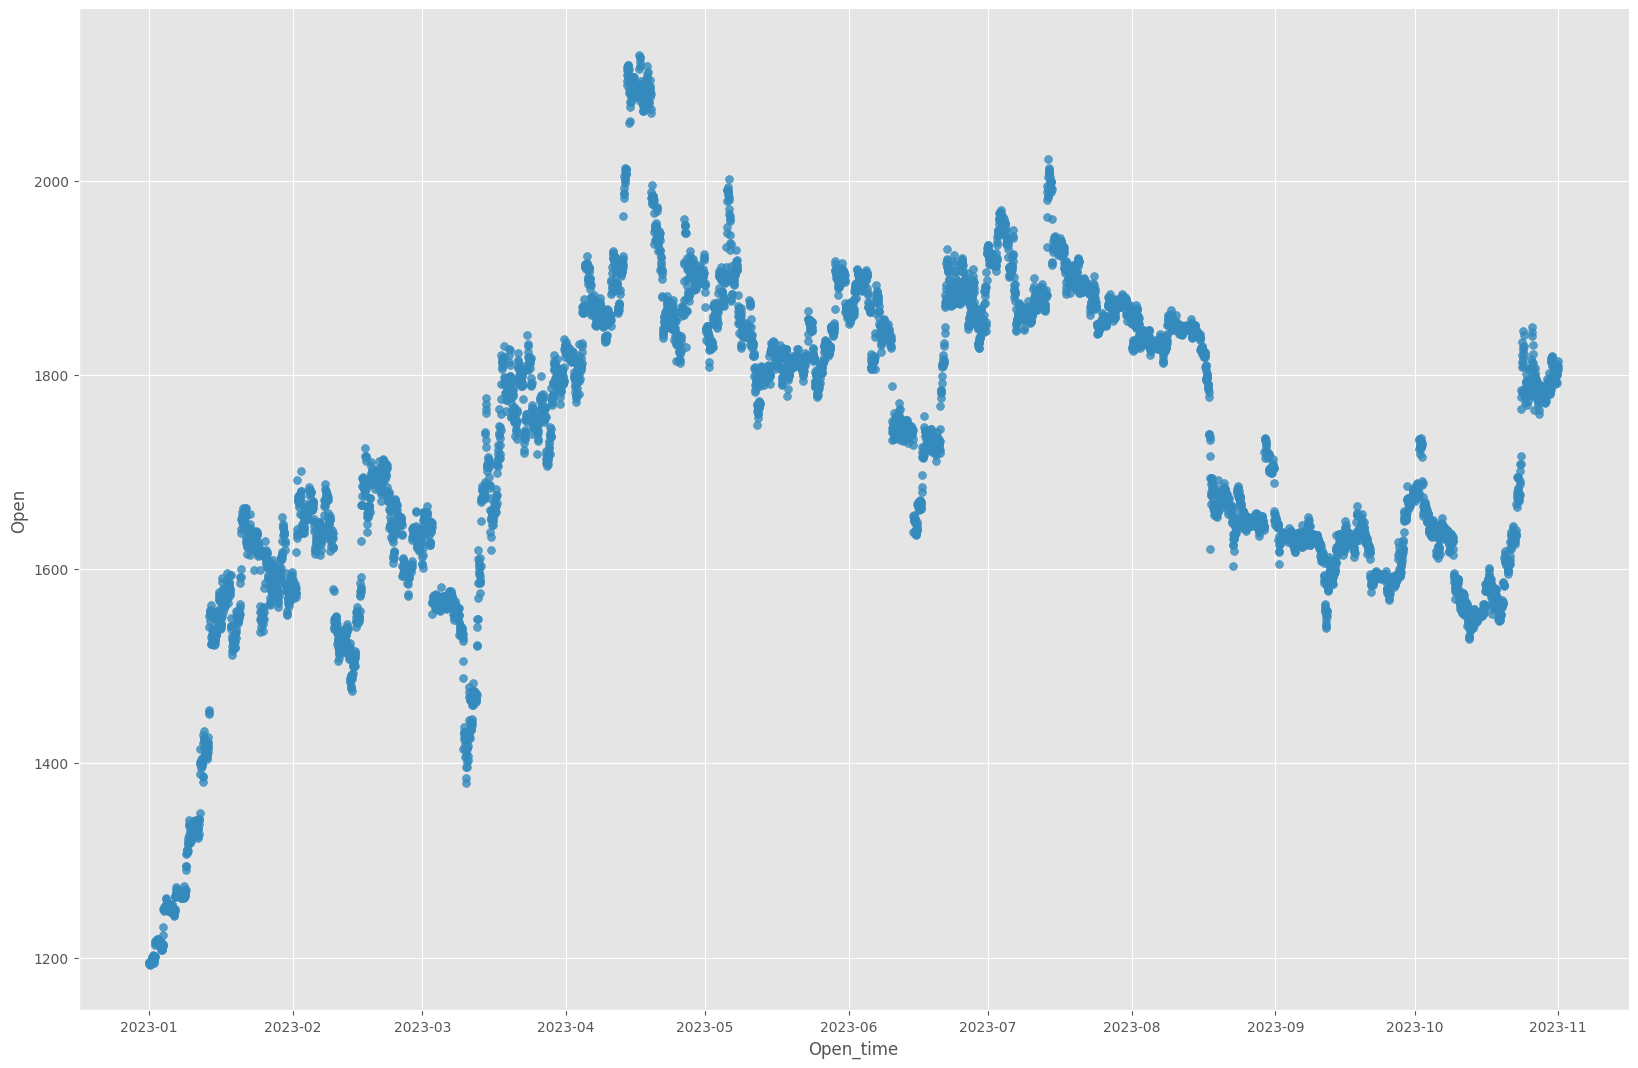

In [34]:
df.plot(kind='scatter', x='Open_time', y='Open', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

Se observa que incrementa el precio y por algunos periodos de tiempo permanece entre un rango, baja el valor y luego vuelve a iniciar el mismo ciclo. A grandes rasgos se observa que el precio de apertura esta en crecimiento.

¿Cómo se comporta el precio de apertura a comparación de el precio Alto a lo largo del tiempo?

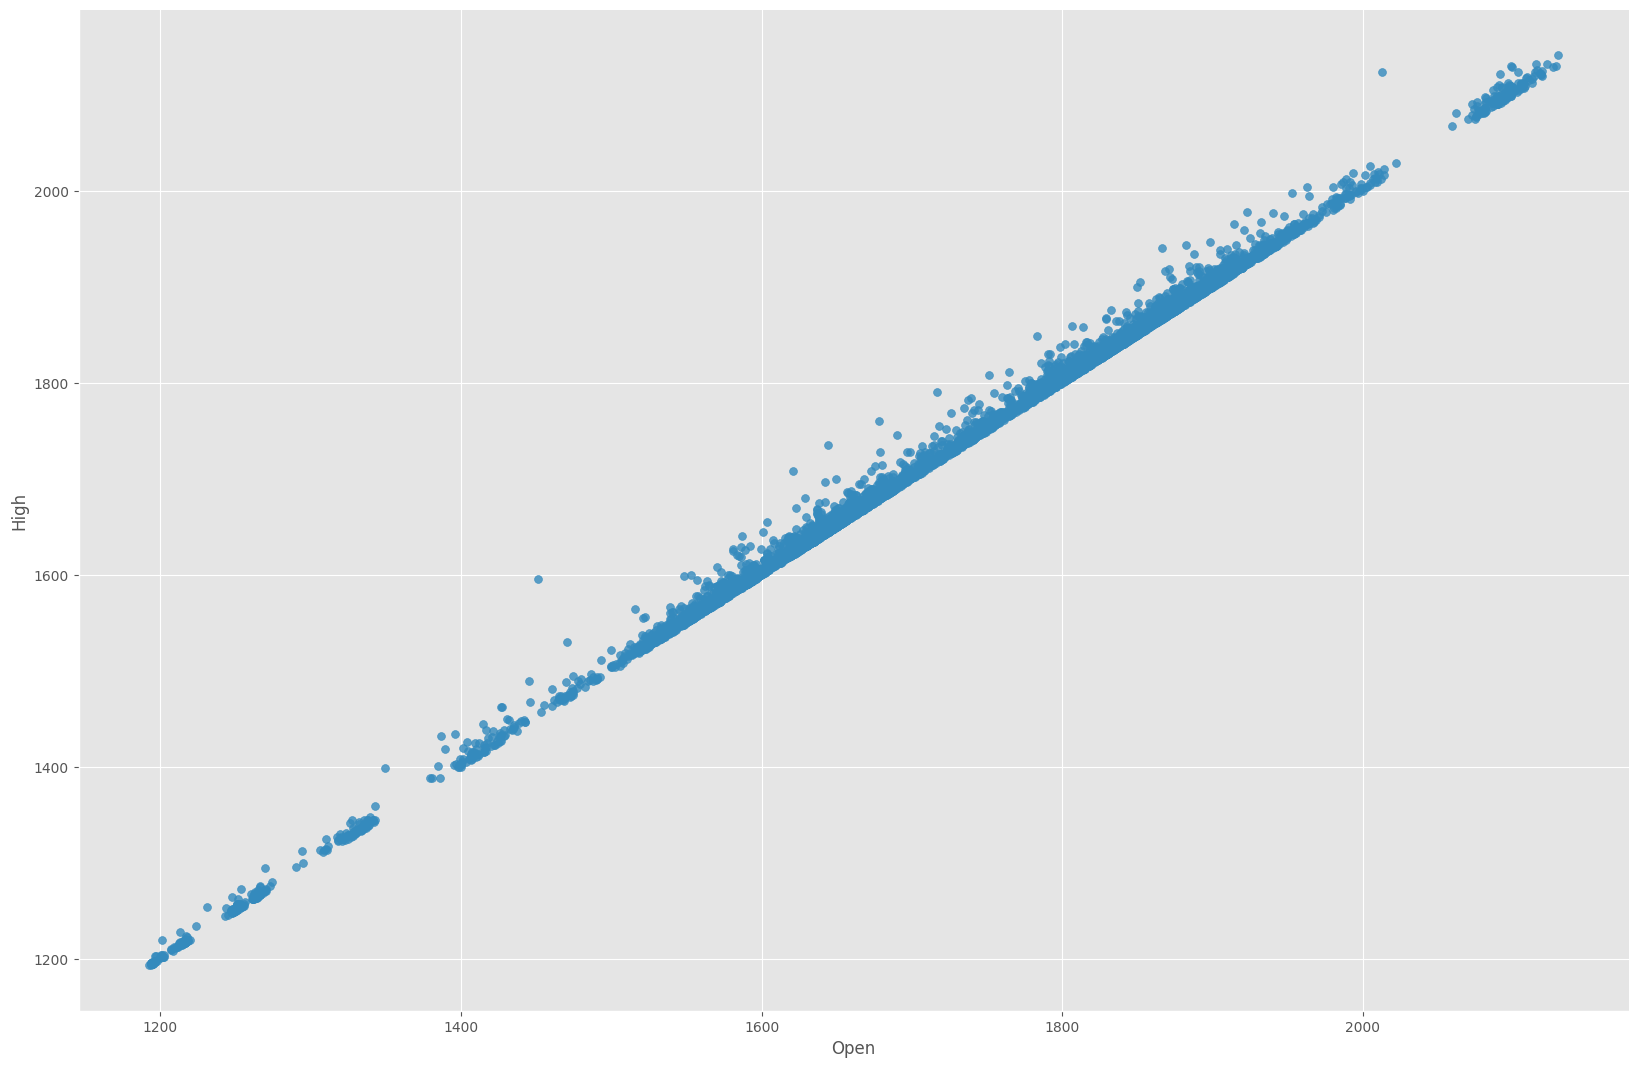

In [19]:
df.plot(kind='scatter', x='Open', y='High', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

Se aprecia que en muchas partes el precio de Apertura y el precio Alto es el mismo.

¿Cómo se comporta el precio de Alto a comparación del precio Bajo a lo largo del tiempo?

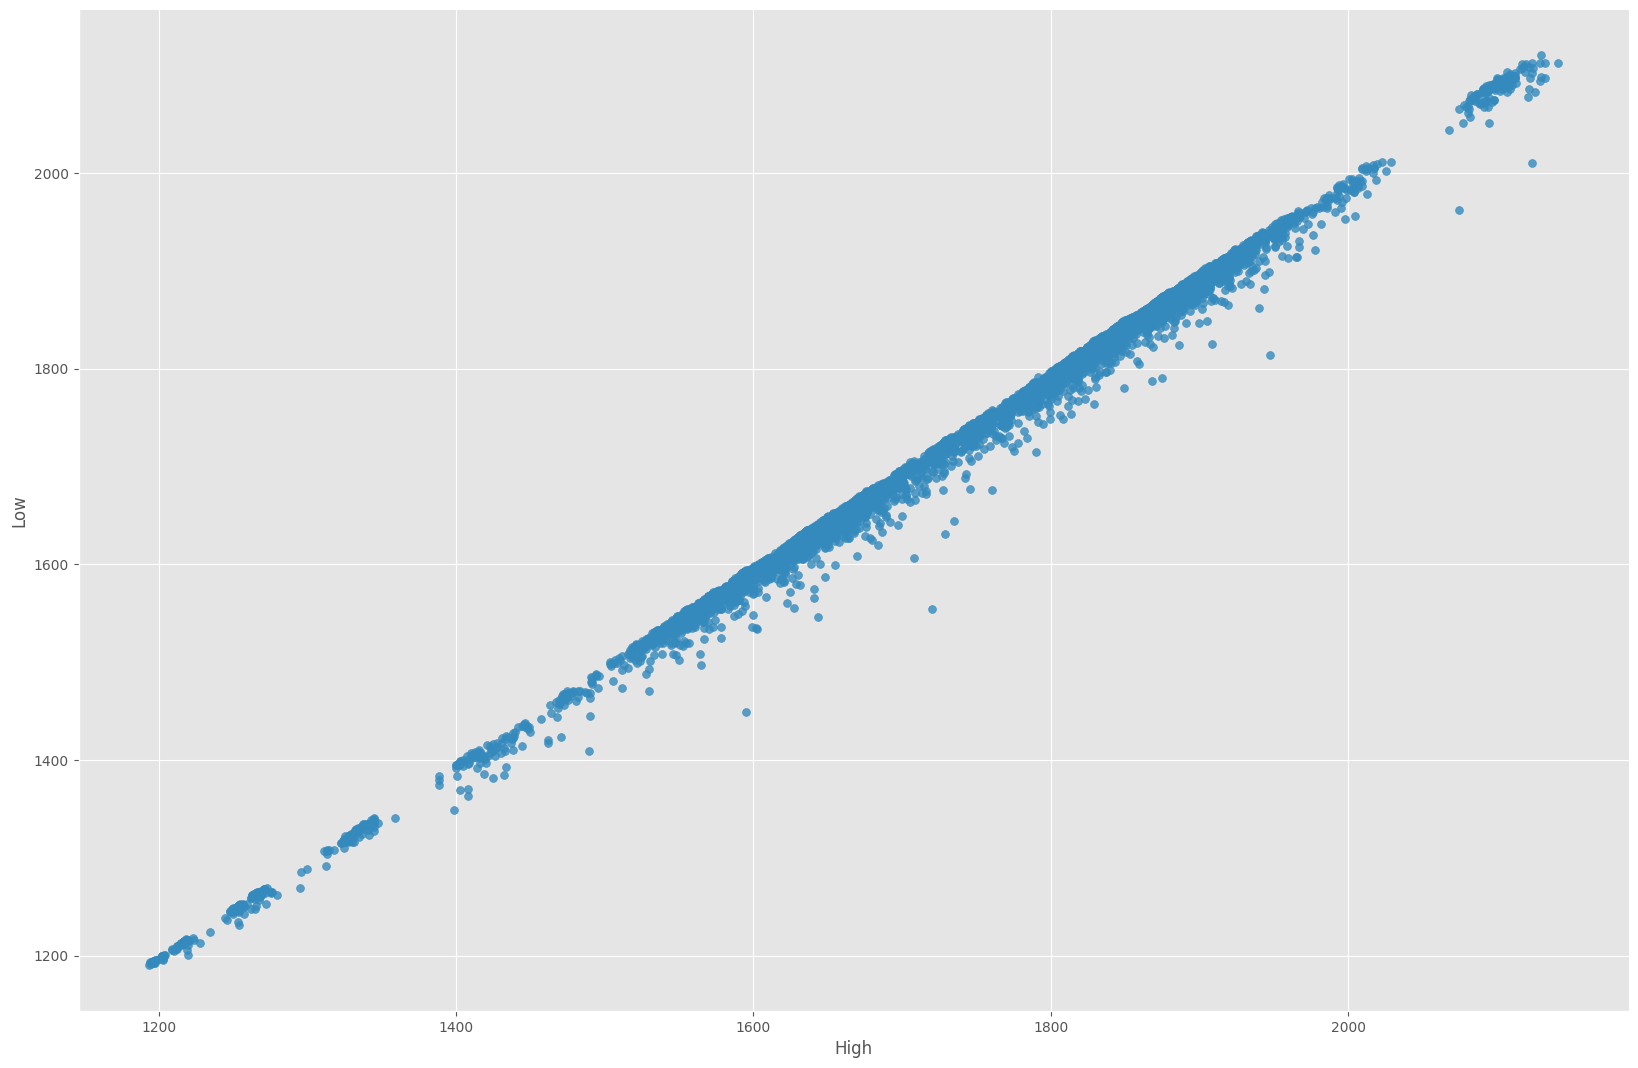

In [21]:
df.plot(kind='scatter', x='High', y='Low', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

Se observa que en muchas ocaciones el precio Alto es igual al precio Bajo.

¿Cómo se comporta el precio de Bajo a comparación del precio de Cierre a lo largo del tiempo?

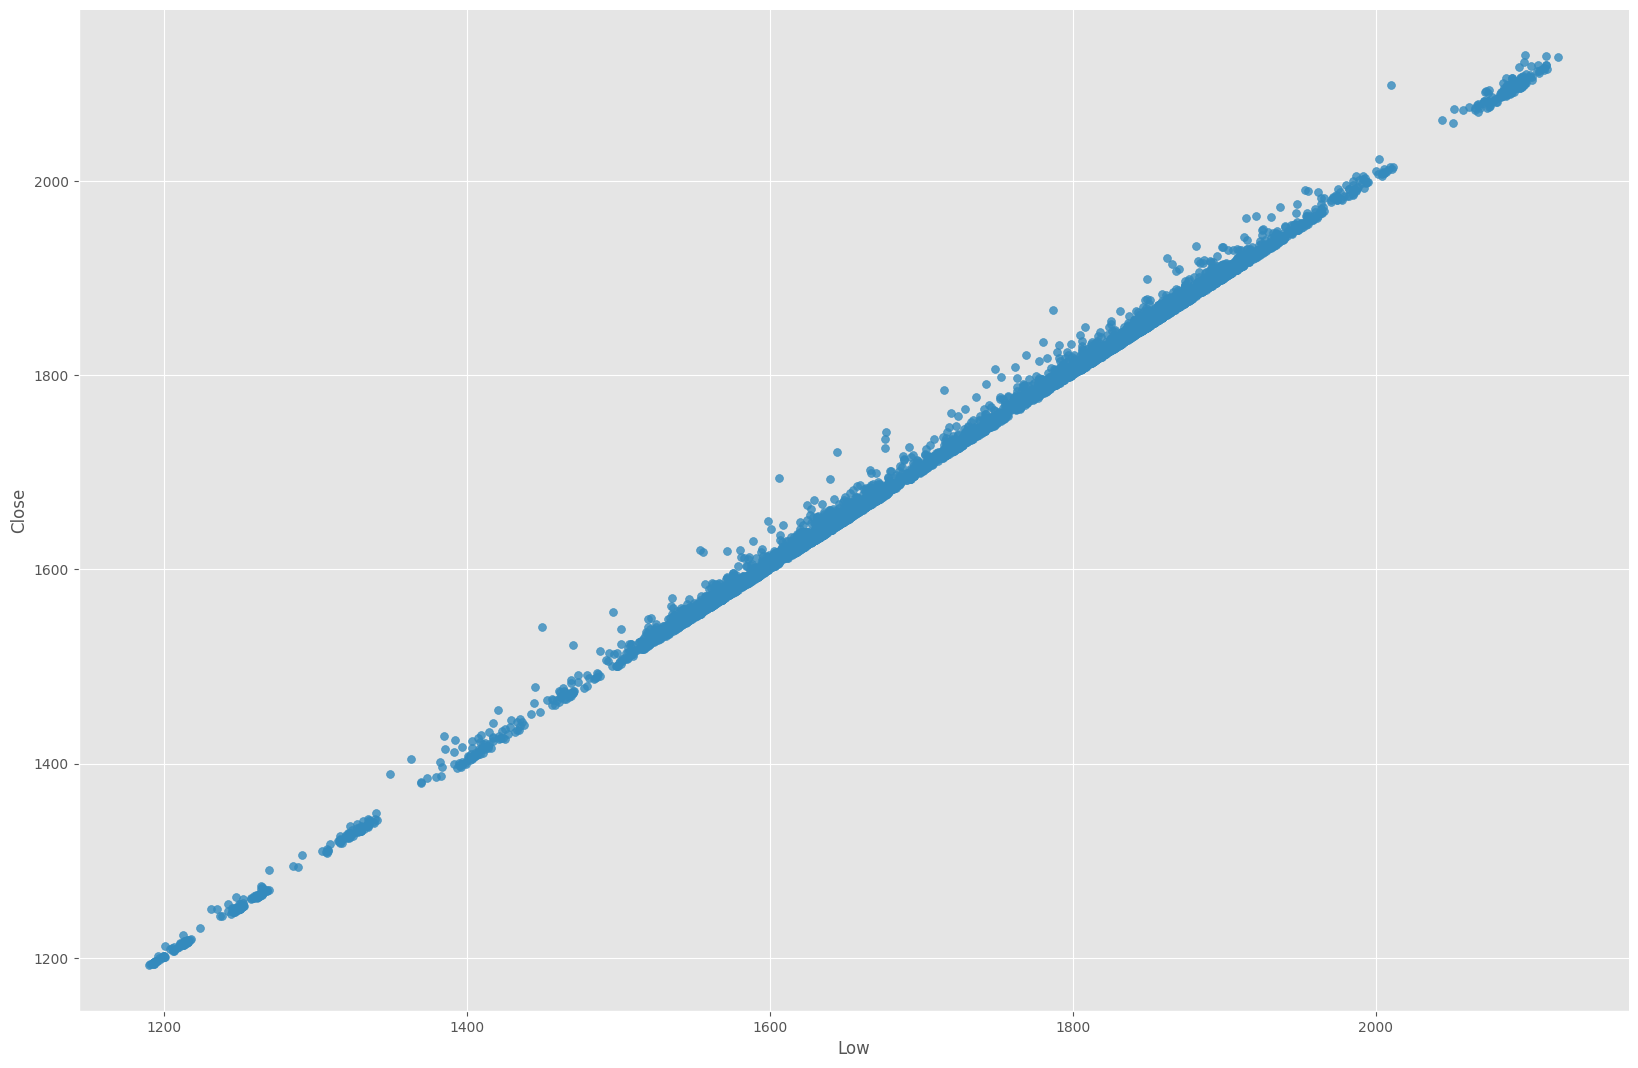

In [23]:
df.plot(kind='scatter', x='Low', y='Close', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

Se presenta el mismo fenómeno que en las visualizaciones pasadas, hay precios que son iguales en distintos tiempos.

¿Cómo se vería la concentración de Volumen econ respecto al precio de Cierre?

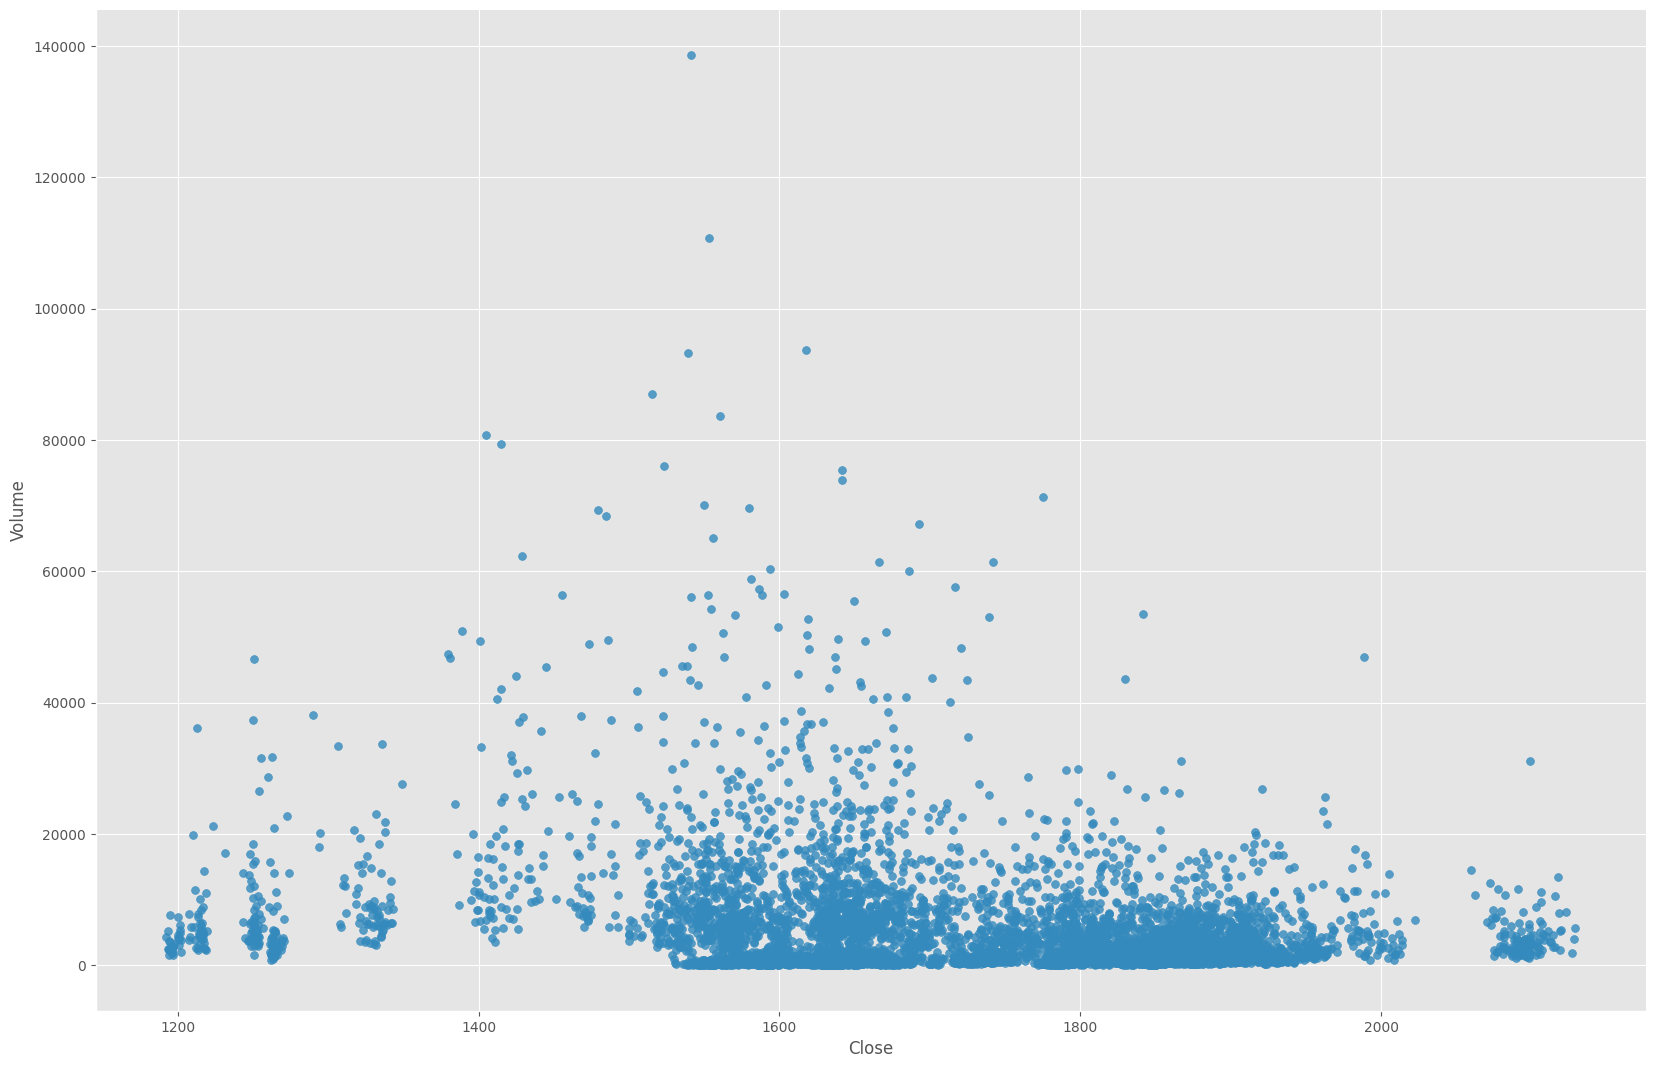

In [30]:
df.plot(kind='scatter', x='Close', y='Volume', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

Se observa que hay volumenes menores entre los precios de 1500 y 2000.

### ¿Cómo cambiaría las visualizaciones si agregaramos variables/características tomando en cuenta la fecha?

Dividiendo 'Open Time'

In [35]:
df.set_index('Open_time', inplace = True)

Día de la Semana

In [36]:
df['day_of_week'] = df.index.dayofweek

Hora del Día

In [37]:
df['hour_of_day'] = df.index.hour

Mes

In [38]:
df['month'] = df.index.month

In [39]:
df.tail()

,Open,High,Low,Close,Volume,Close_time,Quote_asset_volume,Number_of_trades,Taker_buy_base_asset_volume,Taker_buy_quote_asset_volume,Ignore,Response,day_of_week,hour_of_day,month
Open_time,,,,,,,,,,,,,,,
2023-10-31 19:00:00,1809.44,1815.00,1806.45,1811.58,226.0979,2023-10-31 19:59:59.999,409135.147659,898,88.8635,160850.341125,0,1,1,19,10
2023-10-31 20:00:00,1811.27,1818.11,1809.65,1814.16,276.6025,2023-10-31 20:59:59.999,501462.836595,550,100.9516,183083.435573,0,1,1,20,10
2023-10-31 21:00:00,1814.66,1814.66,1802.45,1806.75,258.5225,2023-10-31 21:59:59.999,467864.215783,534,175.2124,317190.740232,0,0,1,21,10
2023-10-31 22:00:00,1806.61,1813.41,1805.20,1809.65,51.7500,2023-10-31 22:59:59.999,93638.397150,287,24.5120,44360.732930,0,1,1,22,10
2023-10-31 23:00:00,1809.41,1816.86,1807.72,1815.27,108.3861,2023-10-31 23:59:59.999,196404.539291,383,53.3712,96770.728286,0,1,1,23,10


¿Qué día de la semana, hora del día y mes tiene más registros de subida de precios?

In [40]:
df_up = df[df['Response'] == 1]
df_down = df[df['Response'] == 0]

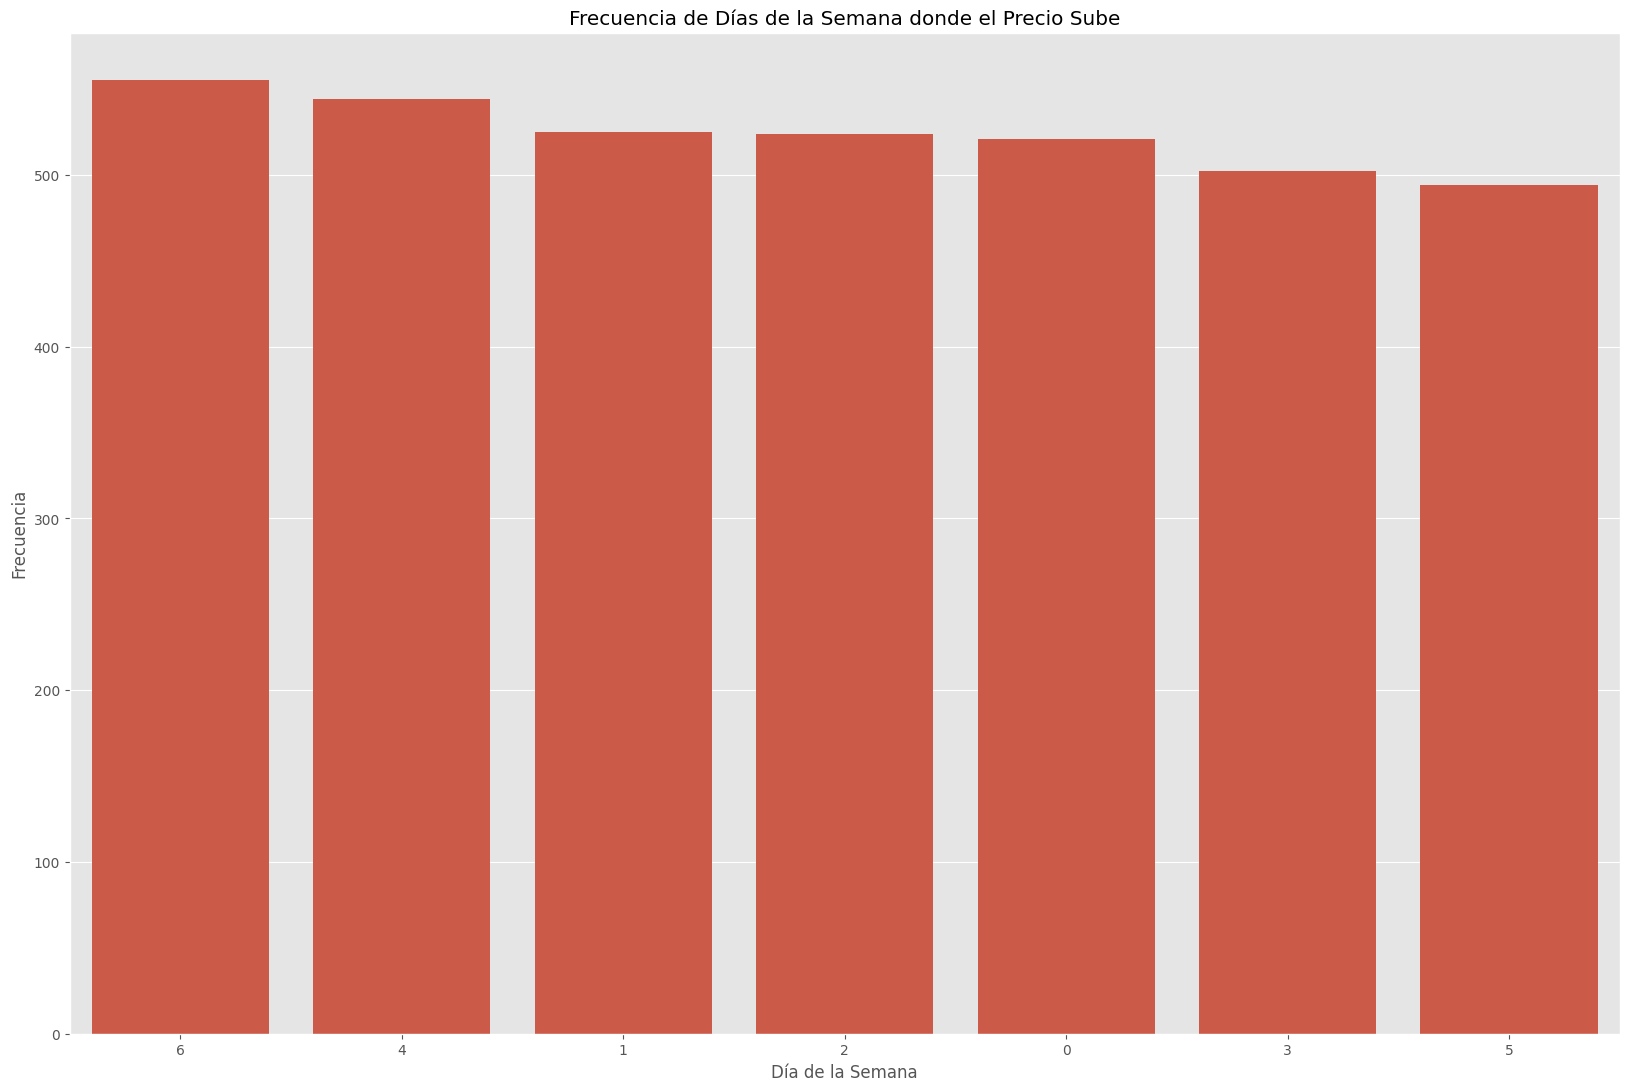

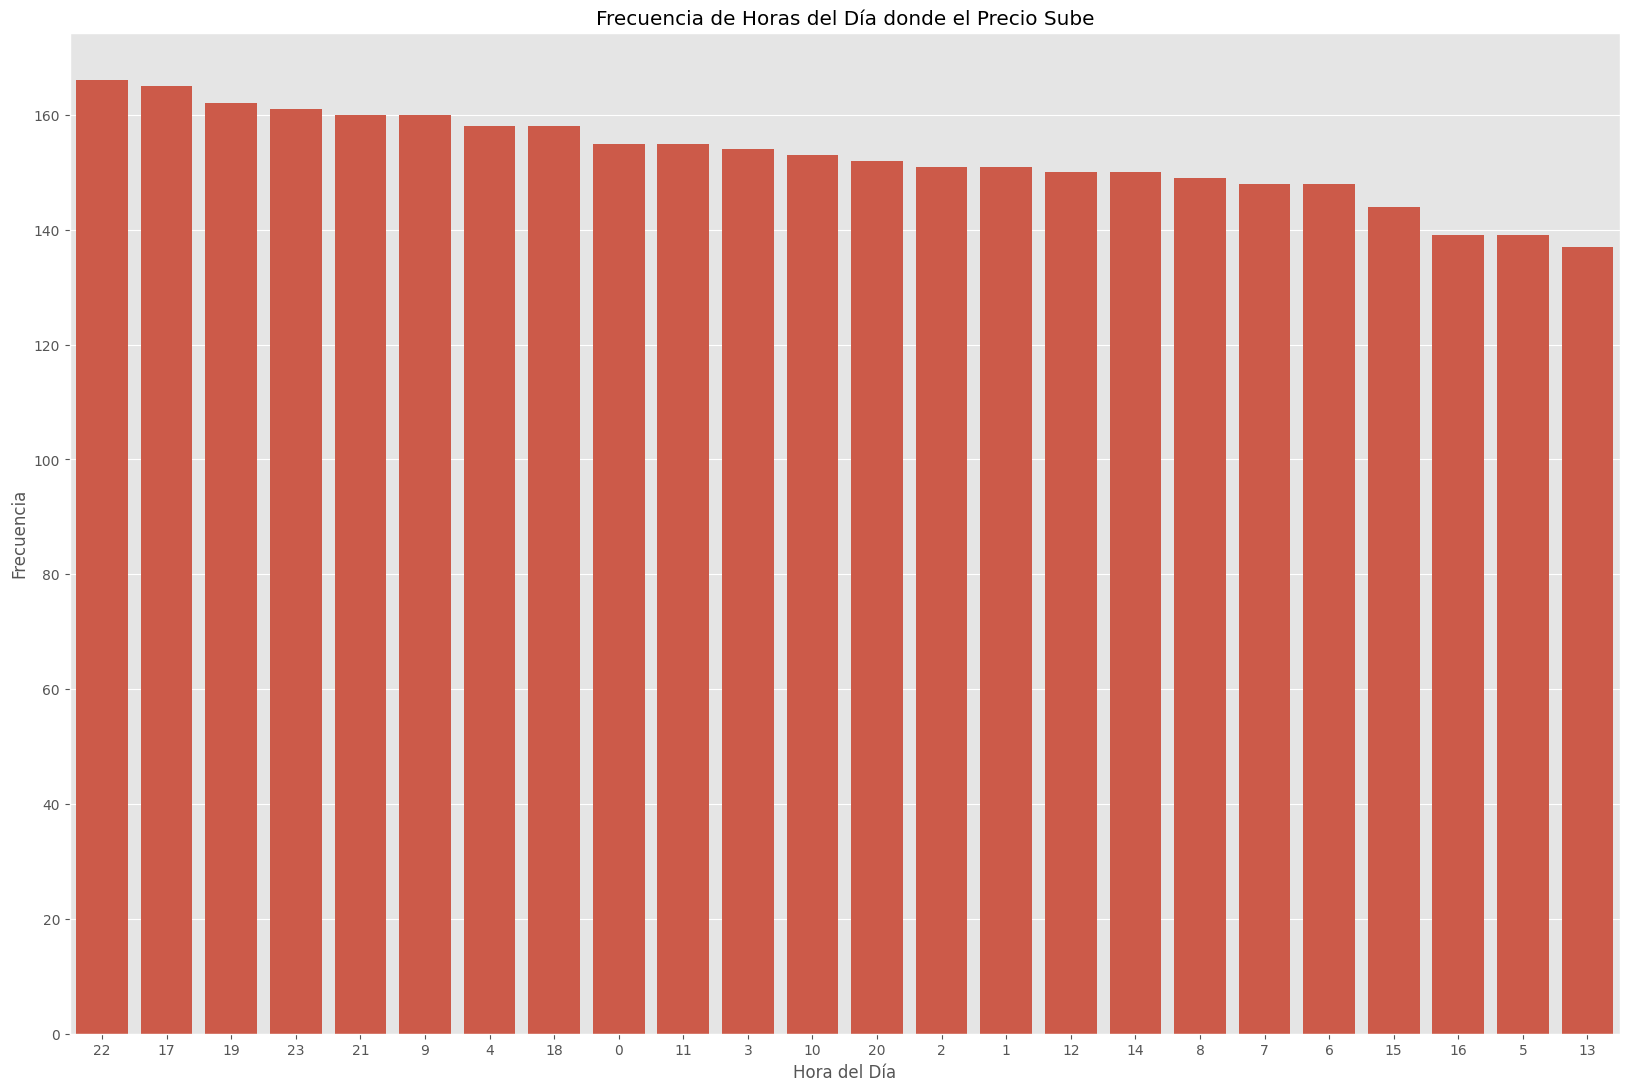

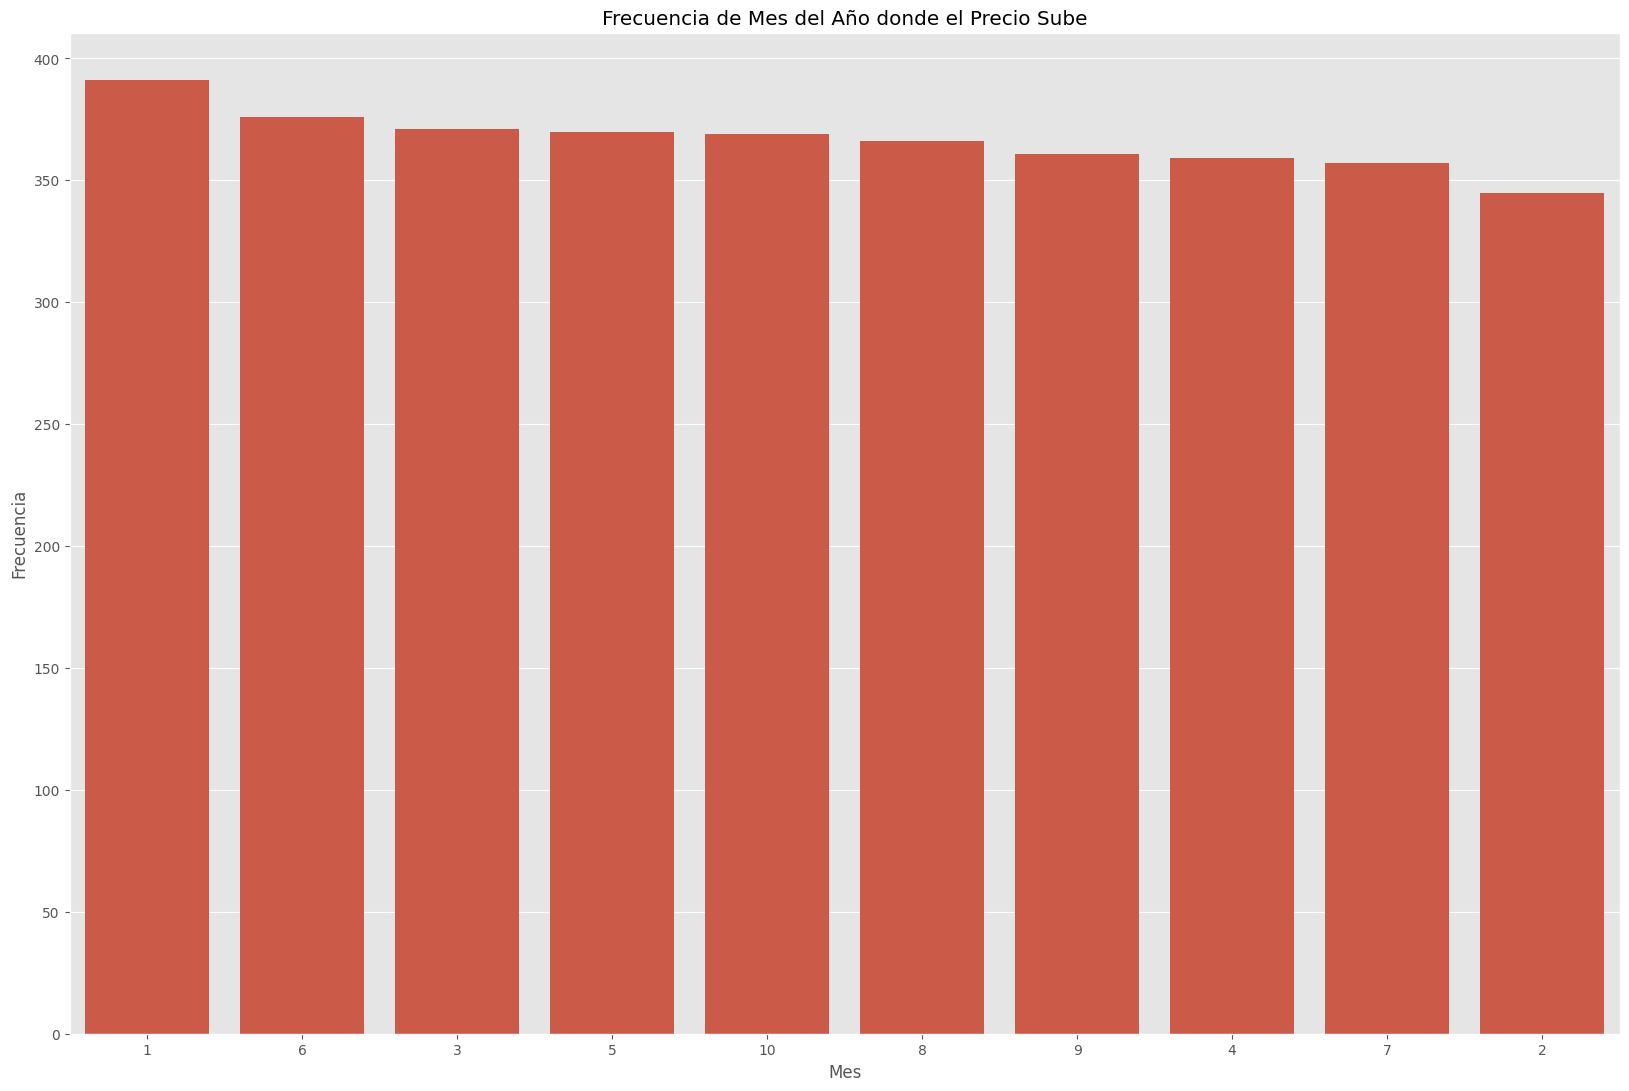

In [41]:
sns.countplot(x='day_of_week', data=df_up, order=df_up['day_of_week'].value_counts().index)
plt.title('Frecuencia de Días de la Semana donde el Precio Sube')
plt.xlabel('Día de la Semana')
plt.ylabel('Frecuencia')
plt.show()

sns.countplot(x='hour_of_day', data=df_up, order=df_up['hour_of_day'].value_counts().index)
plt.title('Frecuencia de Horas del Día donde el Precio Sube')
plt.xlabel('Hora del Día')
plt.ylabel('Frecuencia')
plt.show()

sns.countplot(x='month', data=df_up, order=df_up['month'].value_counts().index)
plt.title('Frecuencia de Mes del Año donde el Precio Sube')
plt.xlabel('Mes')
plt.ylabel('Frecuencia')
plt.show()

Se aprecia que los días 6 y 4 tienen una frecuencia de subida de precio mayor a los demás días de la semana. Las horas con mayor frecuencia de subida de precio es desde las 17 horas hasta las 23, de acuerdo con los datos utilizados. Por último, se observa que los meses que tienen mayor frecuencia de subida de precios son el mes 1 y el 6.

¿Qué día de la semana, hora del día y mes tiene menos registros de subida de precios?


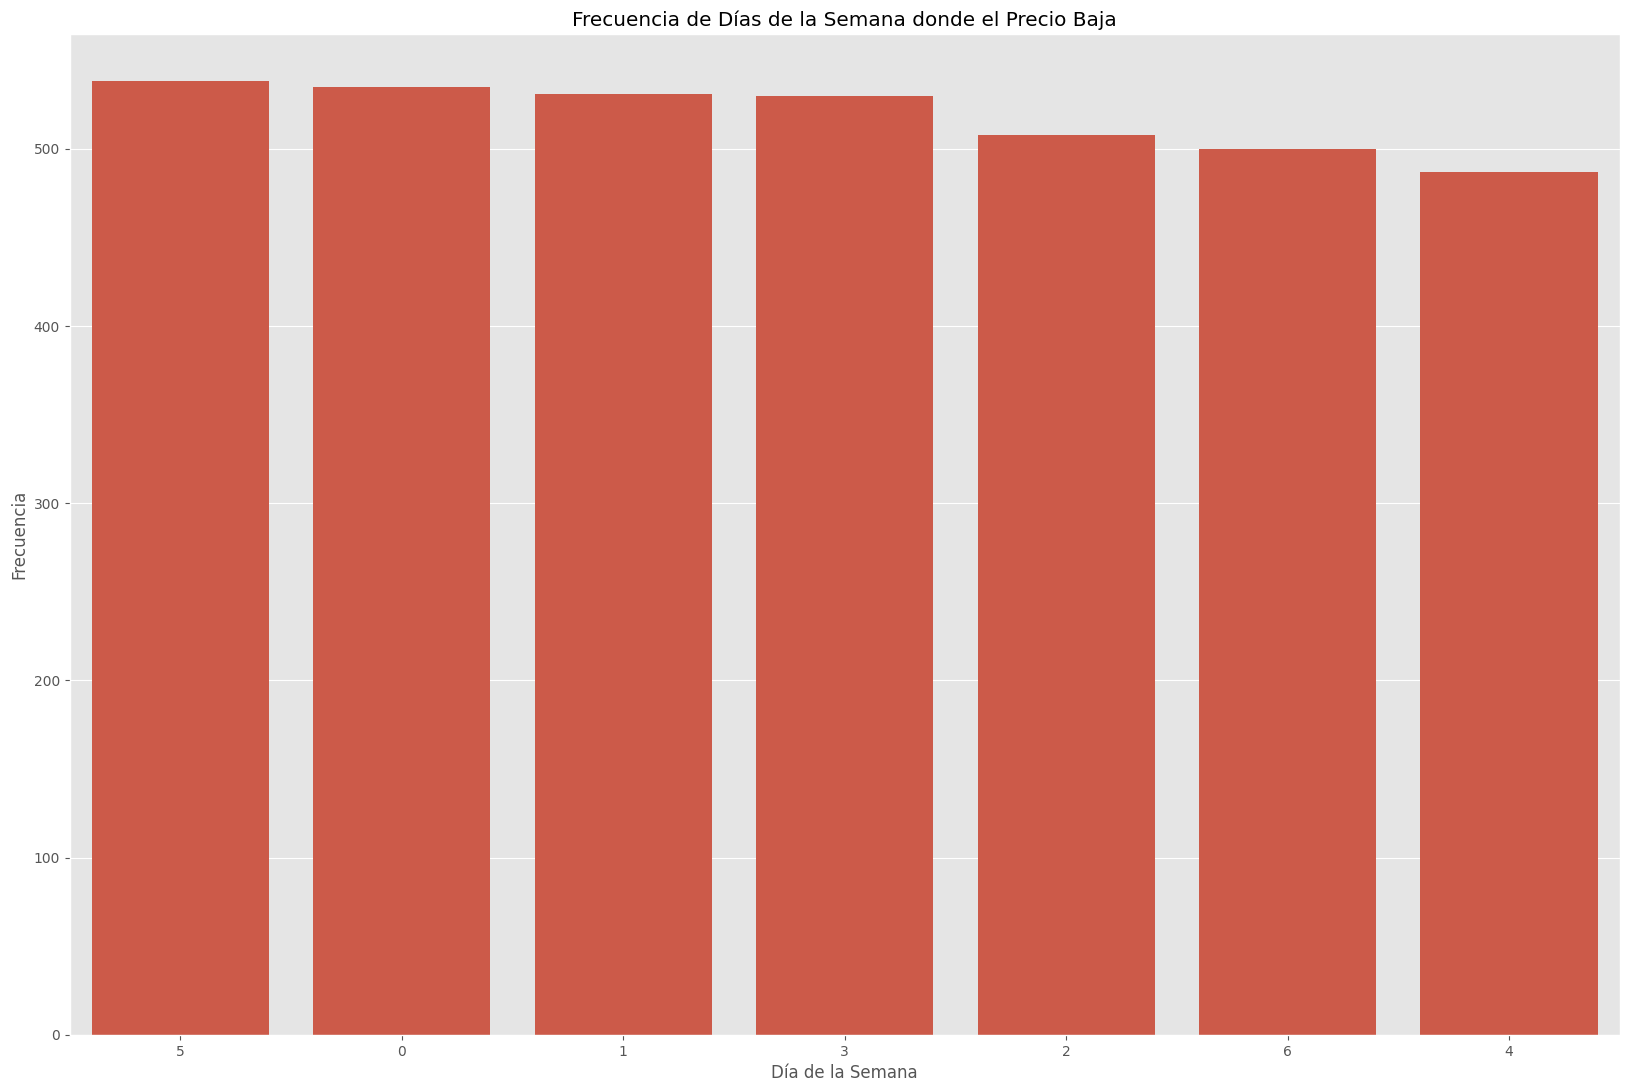

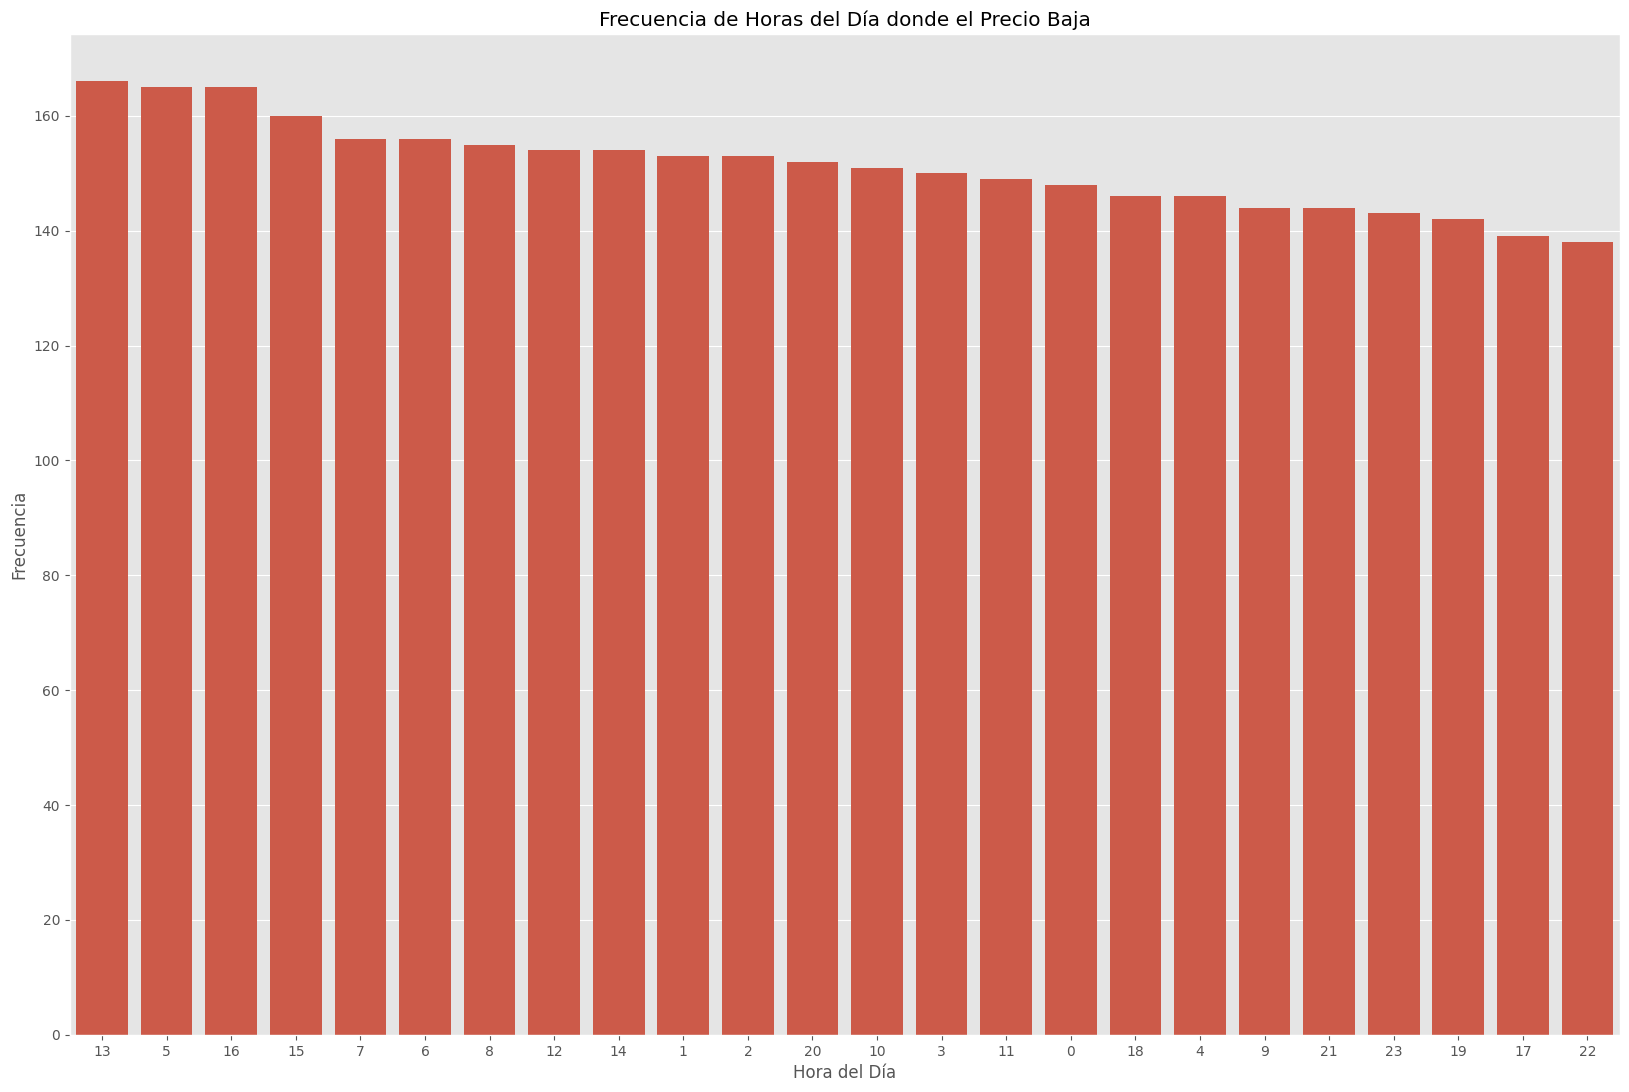

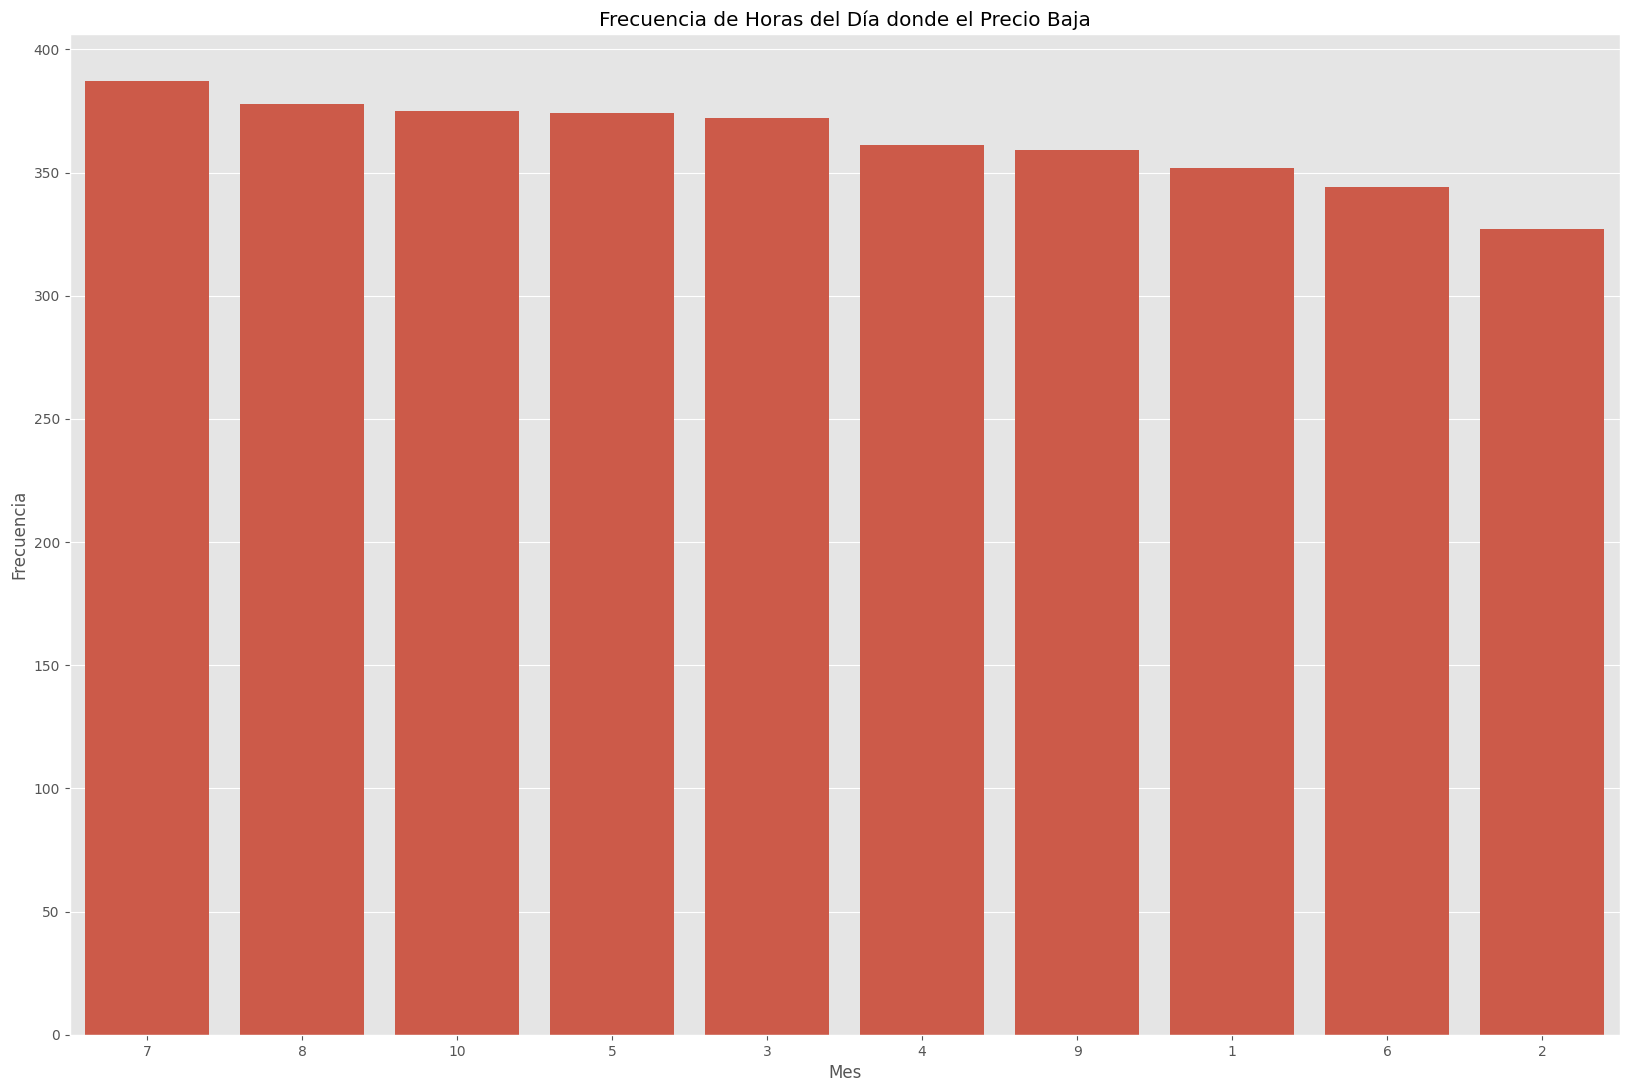

In [42]:
sns.countplot(x='day_of_week', data=df_down, order=df_down['day_of_week'].value_counts().index)
plt.title('Frecuencia de Días de la Semana donde el Precio Baja')
plt.xlabel('Día de la Semana')
plt.ylabel('Frecuencia')
plt.show()

sns.countplot(x='hour_of_day', data=df_down, order=df_down['hour_of_day'].value_counts().index)
plt.title('Frecuencia de Horas del Día donde el Precio Baja')
plt.xlabel('Hora del Día')
plt.ylabel('Frecuencia')
plt.show()

sns.countplot(x='month', data=df_down, order=df_down['month'].value_counts().index)
plt.title('Frecuencia de Horas del Día donde el Precio Baja')
plt.xlabel('Mes')
plt.ylabel('Frecuencia')
plt.show()

Se aprecia que los días 5 y 0 tienen una frecuencia de bajada de precio mayor a los demás días de la semana. Las horas con menor frecuencia de subida de precio es desde las 13 horas hasta las 16 y con un periodo también bajo a las 5. Por último, se observa que los meses que tienen mayor frecuencia de bajada de precios son el mes 7 y el 8.

### ¿Qué pudieramos observar si empezamos a crear nuevas características a partir de operaciones con las columnas ya existentes?

¿Pudiera impactar el rango entre el valor máximo y el mínimo dentro de una misma hora?

In [43]:
df['daily_range'] = df['High'] - df['Low']

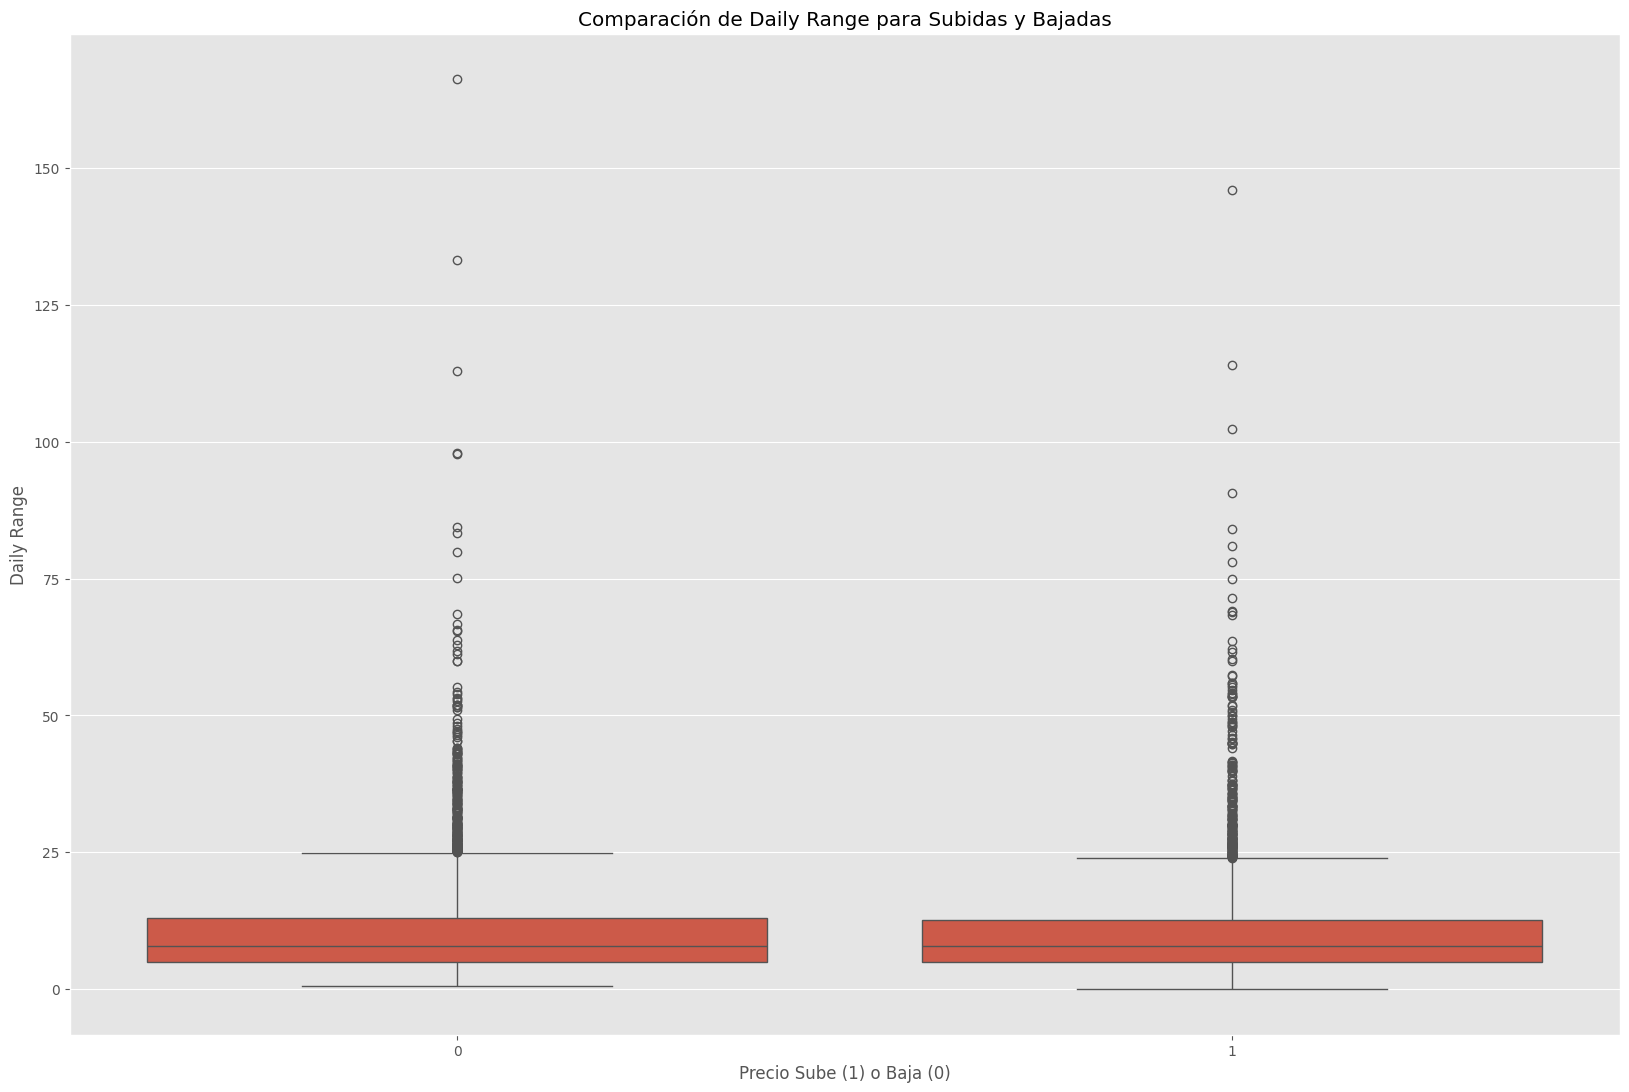

In [44]:
sns.boxplot(x='Response', y='daily_range', data=df)
plt.title('Comparación de Daily Range para Subidas y Bajadas')
plt.xlabel('Precio Sube (1) o Baja (0)')
plt.ylabel('Daily Range')
plt.show()

En la gráfica anterior se puede observar que los gráficos de caja son similares. No se puede observar a simple vista alguna diferencia que la que pudieramos inferir.

In [45]:
df['buy_sell_ratio'] = df['Taker_buy_base_asset_volume'] / df['Taker_buy_quote_asset_volume']

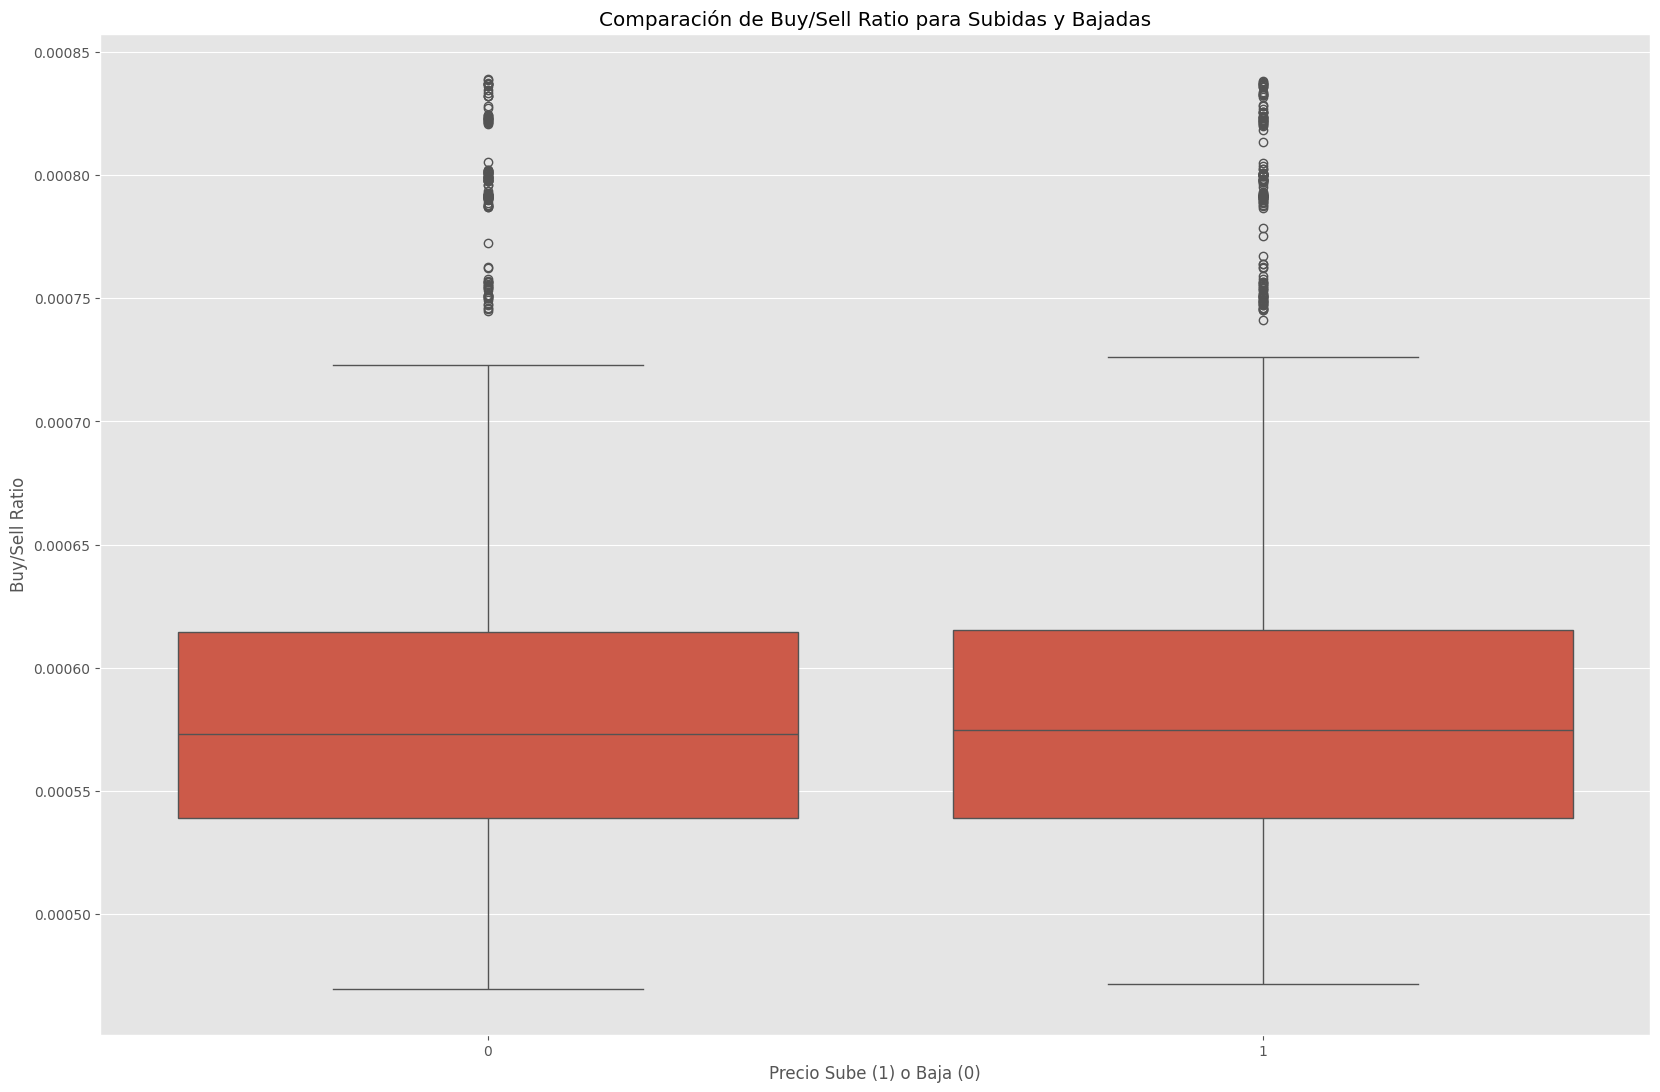

In [46]:
sns.boxplot(x='Response', y='buy_sell_ratio', data=df)
plt.title('Comparación de Buy/Sell Ratio para Subidas y Bajadas')
plt.xlabel('Precio Sube (1) o Baja (0)')
plt.ylabel('Buy/Sell Ratio')
plt.show()

En la gráfica anterior se puede observar que los gráficos de caja son similares. No se puede observar a simple vista alguna diferencia que la que pudieramos inferir.

Volumen promedio

In [47]:
win_size = 24

In [48]:
df['Average_Volume'] = df['Volume'].rolling(window= win_size).mean()

In [49]:
df['Relative_Volume'] = df['Volume'] / df['Average_Volume']

In [50]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Close_time',
       'Quote_asset_volume', 'Number_of_trades', 'Taker_buy_base_asset_volume',
       'Taker_buy_quote_asset_volume', 'Ignore', 'Response', 'day_of_week',
       'hour_of_day', 'month', 'daily_range', 'buy_sell_ratio',
       'Average_Volume', 'Relative_Volume'],
      dtype='object')

In [51]:
df.describe()

,Open,High,Low,Close,Volume,Quote_asset_volume,Number_of_trades,Taker_buy_base_asset_volume,Taker_buy_quote_asset_volume,Ignore,Response,day_of_week,hour_of_day,month,daily_range,buy_sell_ratio,Average_Volume,Relative_Volume
count,7294.000000,7294.000000,7294.000000,7294.000000,7294.000000,7.294000e+03,7294.000000,7294.000000,7.294000e+03,7294.0,7294.000000,7294.000000,7294.000000,7294.000000,7294.000000,7293.000000,7271.000000,7271.000000
mean,1727.334127,1732.547254,1721.959687,1727.414138,4870.269150,8.094398e+06,6818.130244,2448.076130,4.067363e+06,0.0,0.502468,2.992871,11.501371,5.527283,10.587566,0.000585,4880.424950,1.021817
std,163.144044,163.416158,162.773578,163.027326,8140.481230,1.297646e+07,9562.160839,4109.057956,6.543020e+06,0.0,0.500028,2.008266,6.922278,2.870964,9.660124,0.000061,5421.315555,0.983373
min,1192.340000,1193.470000,1190.220000,1192.340000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000469,107.504479,0.000000
25%,1626.547500,1630.987500,1621.392500,1626.657500,603.524225,1.054621e+06,1381.250000,307.624425,5.282185e+05,0.0,0.000000,1.000000,6.000000,3.000000,4.950000,0.000539,842.517827,0.464903
50%,1742.055000,1747.875000,1736.450000,1742.245000,1999.630600,3.575419e+06,3884.500000,1000.199550,1.782572e+06,0.0,1.000000,3.000000,11.500000,6.000000,7.850000,0.000574,2551.846596,0.720035
75%,1855.632500,1860.197500,1851.045000,1855.625000,5902.946375,9.944292e+06,8374.000000,2945.971675,5.021180e+06,0.0,1.000000,5.000000,17.750000,8.000000,12.787500,0.000615,7220.310285,1.212901
max,2130.000000,2141.300000,2120.350000,2129.230000,138580.467400,2.110631e+08,196974.000000,74834.918800,1.139151e+08,0.0,1.000000,6.000000,23.000000,10.000000,166.210000,0.000839,29918.021733,18.923115


Se tomarán los valores del 50% para determinar si es alto o bajo, si es mayor al 50% se asignara un '1' de lo contrario '0'

Valores Altos o Bajos (1,0) en 'Open', 'High', 'Low', 'Close', Volume','Quote_asset_volume', 'Number_of_trades','Taker_buy_base_asset_volume' y 'Taker_buy_quote_asset_volume'

In [60]:
median_open = df['Open'].median()
median_high = df['High'].median()
median_low = df['Low'].median()
median_close = df['Close'].median()
median_volume = df['Volume'].median()
median_quote = df['Quote_asset_volume'].median()
median_number = df['Number_of_trades'].median()
median_base = df['Taker_buy_base_asset_volume'].median()
median_asset = df['Taker_buy_quote_asset_volume'].median()

open_range = []
high_range = []
low_range = []
close_range = []
volume_range = []
quote_range = []
number_range = []
base_range = []
asset_range = []

for i in df['Open']:
  if i > median_open:
    open_range.append(1)
  else:
    open_range.append(0)

df['Open_range'] = open_range

for i in df['High']:
  if i > median_high:
    high_range.append(1)
  else:
    high_range.append(0)

df['High_range'] = high_range

for i in df['Low']:
  if i > median_low:
    low_range.append(1)
  else:
    low_range.append(0)

df['Low_range'] = low_range

for i in df['Close']:
  if i > median_close:
    close_range.append(1)
  else:
    close_range.append(0)

df['Close_range'] = close_range

for i in df['Volume']:
  if i > median_volume:
    volume_range.append(1)
  else:
    volume_range.append(0)

df['Volume_range'] = volume_range

for i in df['Quote_asset_volume']:
  if i > median_quote:
    quote_range.append(1)
  else:
    quote_range.append(0)

df['Quote_range'] = quote_range

for i in df['Number_of_trades']:
  if i > median_number:
    number_range.append(1)
  else:
    number_range.append(0)

df['Number_range'] = number_range

for i in df['Taker_buy_base_asset_volume']:
  if i > median_base:
    base_range.append(1)
  else:
    base_range.append(0)

df['Base_range'] = base_range

for i in df['Taker_buy_quote_asset_volume']:
  if i > median_asset:
    asset_range.append(1)
  else:
    asset_range.append(0)

df['Asset_range'] = asset_range

In [61]:
df.describe()

,Open,High,Low,Close,Volume,Quote_asset_volume,Number_of_trades,Taker_buy_base_asset_volume,Taker_buy_quote_asset_volume,Ignore,...,Relative_Volume,Open_range,High_range,Low_range,Close_range,Volume_range,Quote_range,Number_range,Base_range,Asset_range
count,7294.000000,7294.000000,7294.000000,7294.000000,7294.000000,7.294000e+03,7294.000000,7294.000000,7.294000e+03,7294.0,...,7271.000000,7294.000000,7294.000000,7294.000000,7294.000000,7294.000000,7294.000000,7294.000000,7294.000000,7294.000000
mean,1727.334127,1732.547254,1721.959687,1727.414138,4870.269150,8.094398e+06,6818.130244,2448.076130,4.067363e+06,0.0,...,1.021817,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000
std,163.144044,163.416158,162.773578,163.027326,8140.481230,1.297646e+07,9562.160839,4109.057956,6.543020e+06,0.0,...,0.983373,0.500034,0.500034,0.500034,0.500034,0.500034,0.500034,0.500034,0.500034,0.500034
min,1192.340000,1193.470000,1190.220000,1192.340000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1626.547500,1630.987500,1621.392500,1626.657500,603.524225,1.054621e+06,1381.250000,307.624425,5.282185e+05,0.0,...,0.464903,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1742.055000,1747.875000,1736.450000,1742.245000,1999.630600,3.575419e+06,3884.500000,1000.199550,1.782572e+06,0.0,...,0.720035,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000
75%,1855.632500,1860.197500,1851.045000,1855.625000,5902.946375,9.944292e+06,8374.000000,2945.971675,5.021180e+06,0.0,...,1.212901,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,2130.000000,2141.300000,2120.350000,2129.230000,138580.467400,2.110631e+08,196974.000000,74834.918800,1.139151e+08,0.0,...,18.923115,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Correlación

<ipython-input-62-a562786f0b5f>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_corr.corr()


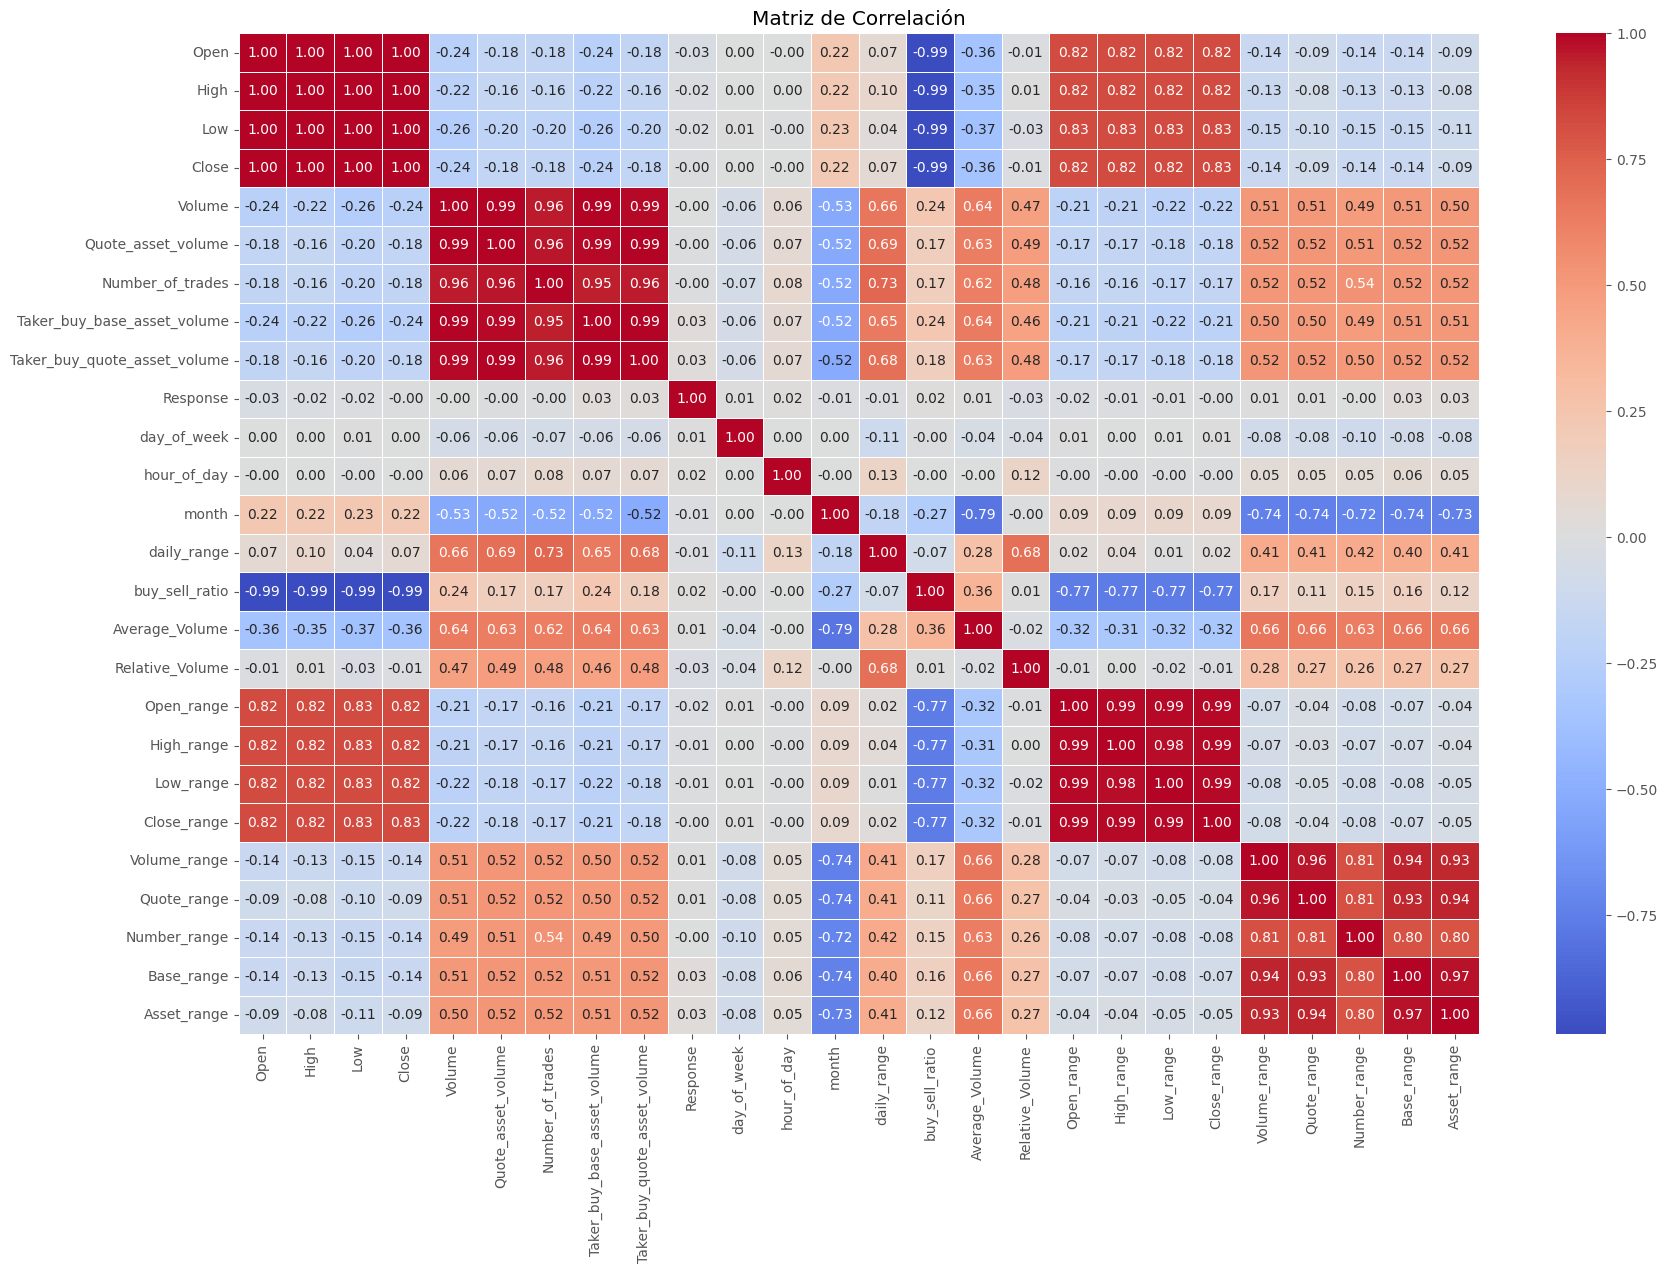

In [62]:
df_corr = df.drop('Ignore', axis = 1)
correlation_matrix = df_corr.corr()


sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matriz de Correlación')
plt.show()

Es evidente que algunas variables tienen alta correlación entre sí tales como:
- 'Open'
- 'High'
- 'Low'
- 'Close'

Así como también:
- 'Volume'
- 'Quote_asset_volume'
- 'Number_of_trades'
- 'Taker_buy_base_volume'
- 'Taker_buy_quote_asset_volume'

# Preprocesamiento

## Identificación de Valores Faltantes

In [63]:
missing_values_count = df.isnull().sum()
print(missing_values_count)
np.shape(df)

Open                             0
High                             0
Low                              0
Close                            0
Volume                           0
Close_time                       0
Quote_asset_volume               0
Number_of_trades                 0
Taker_buy_base_asset_volume      0
Taker_buy_quote_asset_volume     0
Ignore                           0
Response                         0
day_of_week                      0
hour_of_day                      0
month                            0
daily_range                      0
buy_sell_ratio                   1
Average_Volume                  23
Relative_Volume                 23
Open_range                       0
High_range                       0
Low_range                        0
Close_range                      0
Volume_range                     0
Quote_range                      0
Number_range                     0
Base_range                       0
Asset_range                      0
dtype: int64


(7294, 28)

In [69]:
new_df = df.dropna()

In [70]:
missing_values_count_2 = new_df.isnull().sum()
print(missing_values_count_2)
np.shape(new_df)

Open                            0
High                            0
Low                             0
Close                           0
Volume                          0
Close_time                      0
Quote_asset_volume              0
Number_of_trades                0
Taker_buy_base_asset_volume     0
Taker_buy_quote_asset_volume    0
Ignore                          0
Response                        0
day_of_week                     0
hour_of_day                     0
month                           0
daily_range                     0
buy_sell_ratio                  0
Average_Volume                  0
Relative_Volume                 0
Open_range                      0
High_range                      0
Low_range                       0
Close_range                     0
Volume_range                    0
Quote_range                     0
Number_range                    0
Base_range                      0
Asset_range                     0
dtype: int64


(7270, 28)

## División de Datos en Entrenamiento y Prueba

In [71]:
X = new_df.drop(['Response','Close_time','Ignore'], axis=1)
y = new_df['Response']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2,random_state = 1)

In [72]:
X.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7270 entries, 2023-01-02 00:00:00 to 2023-10-31 23:00:00
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Open                          7270 non-null   float64
 1   High                          7270 non-null   float64
 2   Low                           7270 non-null   float64
 3   Close                         7270 non-null   float64
 4   Volume                        7270 non-null   float64
 5   Quote_asset_volume            7270 non-null   float64
 6   Number_of_trades              7270 non-null   int64  
 7   Taker_buy_base_asset_volume   7270 non-null   float64
 8   Taker_buy_quote_asset_volume  7270 non-null   float64
 9   day_of_week                   7270 non-null   int64  
 10  hour_of_day                   7270 non-null   int64  
 11  month                         7270 non-null   int64  
 12  daily_range               

## Escalado

In [73]:
min_max_scaler = preprocessing.MinMaxScaler()
X_train_minmax = min_max_scaler.fit_transform(X_train)
X_test_minmax = min_max_scaler.fit_transform(X_test)

# Principal Component Analysis

In [74]:
X_std = StandardScaler().fit_transform(X)

In [75]:
cov_matrix = np.cov(X_std, rowvar=False)

In [76]:
pca = PCA()
principal_components = pca.fit_transform(X_std)

## Varianza Acumulada

In [77]:
explained_variance_ratio_cumsum = np.cumsum(pca.explained_variance_ratio_)
print("Varianza explicada por cada componente principal:", explained_variance_ratio_cumsum)

Varianza explicada por cada componente principal: [0.41484411 0.6957846  0.79791645 0.84558283 0.88559427 0.92215222
 0.95318278 0.96552549 0.97572861 0.98372882 0.98909024 0.99281681
 0.99472911 0.99618051 0.99708519 0.9978257  0.99841174 0.99894217
 0.99943412 0.99973582 0.99995061 0.99999176 0.99999882 1.
 1.        ]


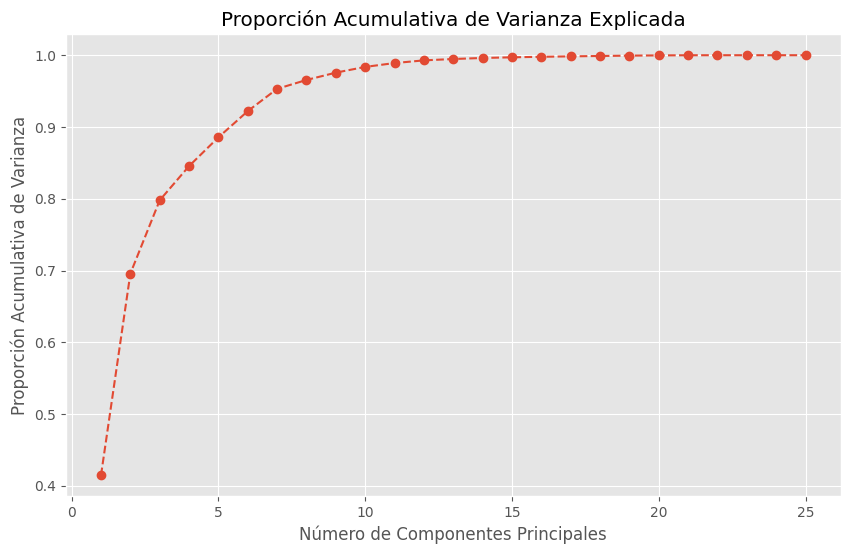

In [78]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio_cumsum)+1), explained_variance_ratio_cumsum, marker='o', linestyle='--')
plt.title('Proporción Acumulativa de Varianza Explicada')
plt.xlabel('Número de Componentes Principales')
plt.ylabel('Proporción Acumulativa de Varianza')
plt.grid(True)
plt.show()

## Selección de Número de Componentes

In [79]:
n_components = 13
pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_train_minmax)
X_test_pca = pca.transform(X_test_minmax)

# Modelo de Redes Neuronales

## Función del Modelo

In [80]:
def model_nn():
  model = tf.keras.Sequential()
  model.add(Dense(25, input_dim=X_train.shape[1], activation='relu'))
  model.add(Dropout(0.3),)
  model.add(Dense(12, activation='relu'))
  model.add(Dropout(0.3),)
  model.add(Dense(1, activation='sigmoid'))
  model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
  return model

## Modelo en Keras

In [81]:
nnmodel = KerasClassifier(model = model_nn)

## Espacio de Búsqueda de Hiperparámetros

In [ ]:
batchSize = [10, 50, 100]
epochs = [10, 30 ,50]
parameter_grid = dict(batch_size = batchSize, epochs=epochs)

In [ ]:
mygrid = GridSearchCV(estimator = nnmodel, param_grid = parameter_grid, n_jobs = 1, cv = 3)
grid_result = mygrid.fit(principal_components,y)

Epoch 1/10
485/485 [==============================] - 2s 2ms/step - loss: 0.7012 - accuracy: 0.4967
Epoch 2/10
485/485 [==============================] - 1s 2ms/step - loss: 0.6934 - accuracy: 0.5118
Epoch 3/10
485/485 [==============================] - 1s 2ms/step - loss: 0.6924 - accuracy: 0.5217
Epoch 4/10
485/485 [==============================] - 1s 2ms/step - loss: 0.6884 - accuracy: 0.5376
Epoch 5/10
485/485 [==============================] - 1s 3ms/step - loss: 0.6850 - accuracy: 0.5458
Epoch 6/10
485/485 [==============================] - 2s 3ms/step - loss: 0.6741 - accuracy: 0.5776
Epoch 7/10
485/485 [==============================] - 2s 4ms/step - loss: 0.6305 - accuracy: 0.6461
Epoch 8/10
485/485 [==============================] - 1s 2ms/step - loss: 0.5663 - accuracy: 0.7097
Epoch 9/10
485/485 [==============================] - 1s 2ms/step - loss: 0.4841 - accuracy: 0.7761
Epoch 10/10
243/243 [==============================] - 1s 2ms/step
Epoch 1/10
485/485 [=============

In [ ]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.962591 using {'batch_size': 10, 'epochs': 50}


In [ ]:
def model_nn(optimizer='SGD'):
  model = tf.keras.Sequential()
  model.add(Dense(18, input_dim=X_train.shape[1], activation='relu'))
  model.add(Dropout(0.3),) #técnica de regularización, Goeff Hinto
  model.add(Dense(9, activation='relu'))
  model.add(Dropout(0.3),)
  model.add(Dense(1, activation='sigmoid'))
  model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
  return model

In [ ]:
nnmodel = KerasClassifier(model = model_nn, batch_size = 10, epochs = 50)

In [ ]:
optimizer = ['SGD','Adam', 'Adadelta']
param = dict(optimizer=optimizer)

In [ ]:
grid1 = GridSearchCV(estimator = nnmodel, param_grid=param, n_jobs=-1, cv=3)
grid_result1 = grid1.fit(principal_components,y)

Epoch 1/50
727/727 [==============================] - 3s 3ms/step - loss: 0.7293 - accuracy: 0.4908
Epoch 2/50
727/727 [==============================] - 1s 2ms/step - loss: 0.7002 - accuracy: 0.5039
Epoch 3/50
727/727 [==============================] - 1s 2ms/step - loss: 0.6976 - accuracy: 0.5059
Epoch 4/50
727/727 [==============================] - 2s 2ms/step - loss: 0.6950 - accuracy: 0.4948
Epoch 5/50
727/727 [==============================] - 1s 2ms/step - loss: 0.6935 - accuracy: 0.5106
Epoch 6/50
727/727 [==============================] - 1s 2ms/step - loss: 0.6932 - accuracy: 0.5177
Epoch 7/50
727/727 [==============================] - 1s 2ms/step - loss: 0.6934 - accuracy: 0.5118
Epoch 8/50
727/727 [==============================] - 2s 2ms/step - loss: 0.6927 - accuracy: 0.5131
Epoch 9/50
727/727 [==============================] - 2s 3ms/step - loss: 0.6929 - accuracy: 0.5096
Epoch 10/50
727/727 [==============================] - 2s 3ms/step - loss: 0.6918 - accuracy: 0.5111

In [ ]:
print("Best: %f using %s" % (grid_result1.best_score_, grid_result1.best_params_))

Best: 0.548424 using {'optimizer': 'Adam'}


## Modelo Final

In [143]:
def model_nnnnn():
  model = tf.keras.Sequential()
  model.add(Dense(25, input_dim=X_train_pca.shape[1], activation='relu'))
  model.add(Dropout(0.3),)
  model.add(Dense(15, activation='relu'))
  model.add(Dropout(0.3),)
  model.add(Dense(10, activation='relu'))
  model.add(Dropout(0.3),)
  model.add(Dense(1, activation='sigmoid'))
  model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])
  return model

In [155]:
nnnnnmodel = KerasClassifier(model = model_nnnnn, batch_size = 100, epochs = 50)

In [156]:
nnnnnmodel.fit(X_train_pca,y_train)

Epoch 1/50
59/59 [==============================] - 1s 2ms/step - loss: 0.7020 - accuracy: 0.5098
Epoch 2/50
59/59 [==============================] - 0s 2ms/step - loss: 0.6949 - accuracy: 0.5052
Epoch 3/50
59/59 [==============================] - 0s 2ms/step - loss: 0.6946 - accuracy: 0.5000
Epoch 4/50
59/59 [==============================] - 0s 2ms/step - loss: 0.6944 - accuracy: 0.5010
Epoch 5/50
59/59 [==============================] - 0s 2ms/step - loss: 0.6933 - accuracy: 0.4993
Epoch 6/50
59/59 [==============================] - 0s 2ms/step - loss: 0.6927 - accuracy: 0.5074
Epoch 7/50
59/59 [==============================] - 0s 2ms/step - loss: 0.6932 - accuracy: 0.4998
Epoch 8/50
59/59 [==============================] - 0s 2ms/step - loss: 0.6939 - accuracy: 0.4972
Epoch 9/50
59/59 [==============================] - 0s 2ms/step - loss: 0.6929 - accuracy: 0.5046
Epoch 10/50
59/59 [==============================] - 0s 2ms/step - loss: 0.6930 - accuracy: 0.5108
Epoch 11/50
59/59 [

KerasClassifier(
	model=<function model_nnnnn at 0x7b286856a680>
	build_fn=None
	warm_start=False
	random_state=None
	optimizer=rmsprop
	loss=None
	metrics=None
	batch_size=100
	validation_batch_size=None
	verbose=1
	callbacks=None
	validation_split=0.0
	shuffle=True
	run_eagerly=False
	epochs=50
	class_weight=None
)

## Predicción

In [157]:
y_pred = nnnnnmodel.predict(X_test_pca)

15/15 [==============================] - 0s 2ms/step


In [158]:
print('Accuracy of neural network classifier on train set: {:.2f}'.format(nnnnnmodel.score(X_train_pca, y_train)))

59/59 [==============================] - 0s 2ms/step
Accuracy of neural network classifier on train set: 0.52


In [159]:
print('Accuracy of neural network classifier on test set: {:.2f}'.format(nnnnnmodel.score(X_test_pca, y_test)))

15/15 [==============================] - 0s 1ms/step
Accuracy of neural network classifier on test set: 0.52


In [161]:
print('Precision of neural network classifier on test set: {:.2f}'.format(precision_score(y_test, y_pred)))

Precision of neural network classifier on test set: 0.51


### Métricas

In [162]:
accuracy_nn = accuracy_score(y_test, y_pred)
precision_nn = precision_score(y_test, y_pred)
recall_nn = recall_score(y_test, y_pred)
f1_score_nn = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
print(accuracy_nn, precision_nn, recall_nn, f1_score_nn, conf_matrix)

0.5213204951856947 0.512751677852349 0.5342657342657343 0.5232876712328768 [[376 363]
 [333 382]]


In [163]:
y_scores = nnnnnmodel.predict_proba(X_test_pca)[:, 1]

15/15 [==============================] - 0s 2ms/step


In [164]:
fpr_nn, tpr_nn, thresholds_nn = roc_curve(y_test, y_scores)
auc_roc_nn = roc_auc_score(y_test, y_scores)

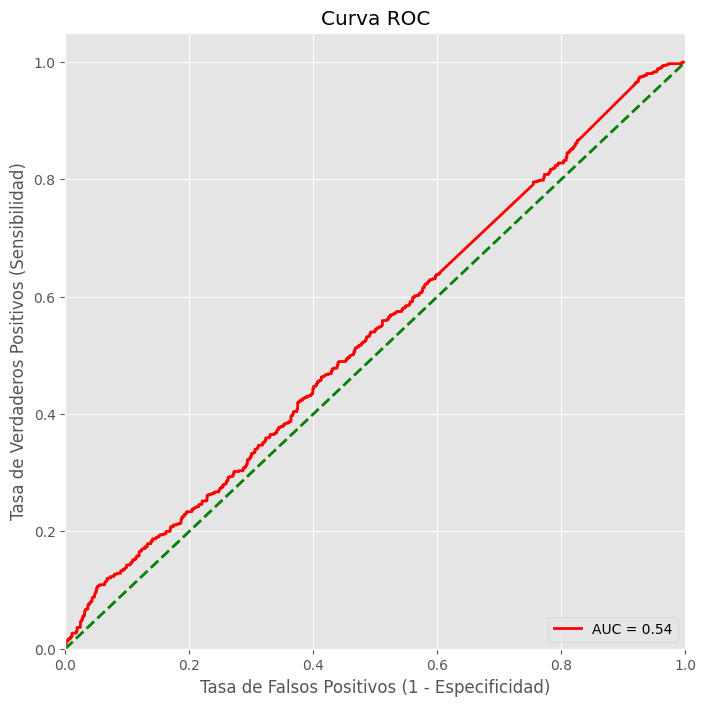

In [165]:
plt.figure(figsize=(8, 8))
plt.plot(fpr_nn, tpr_nn, color='red', lw=2, label=f'AUC = {auc_roc_nn:.2f}')
plt.plot([0, 1], [0, 1], color='green', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos (1 - Especificidad)')
plt.ylabel('Tasa de Verdaderos Positivos (Sensibilidad)')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

# Modelo Regresión Logística

## Modelo en SKLearn

In [166]:
lrmodel = LogisticRegression()

## Definición de Parámetros

In [167]:
solvers = ['newton-cg','liblinear','lbfgs']
penalty = ['l2','l1', 'elasticnet']
c_values = [100, 10, 1.0, 0.1, 0.01]

## Espacio de Búsqueda de Hiperparámetros

In [95]:
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=5, random_state=1)
grid_search = GridSearchCV(estimator=lrmodel, param_grid=grid, n_jobs=-1, cv=3, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(principal_components, y)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
75 fits failed out of a total of 135.
The score on these train-test partitions for these parameters will be set to 0.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Solver

In [96]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

Best: 0.988995 using {'C': 100, 'penalty': 'l1', 'solver': 'liblinear'}


## Modelo Final

In [168]:
logreg = LogisticRegression(solver = 'liblinear', penalty='l2', C=100)
logreg.fit(X_train_pca, y_train)

LogisticRegression(C=100, solver='liblinear')

## Predicción

In [169]:
y_pred_lr = logreg.predict(X_test_pca)

In [170]:
print('Accuracy of logistic regression classifier on train set: {:.2f}'.format(logreg.score(X_train_pca, y_train)))

Accuracy of logistic regression classifier on train set: 0.52


In [171]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test_pca, y_test)))

Accuracy of logistic regression classifier on test set: 0.54


In [172]:
print('Precision of logistic regression classifier on test set: {:.2f}'.format(precision_score(y_test, y_pred_lr)))


Precision of logistic regression classifier on test set: 0.53


### Métricas

In [102]:
accuracy_lr = accuracy_score(y_test, y_pred_lr)
precision_lr = precision_score(y_test, y_pred_lr)
recall_lr = recall_score(y_test, y_pred_lr)
f1_score_lr = f1_score(y_test, y_pred_lr)
conf_matrix = confusion_matrix(y_test, y_pred_lr)
print(accuracy_lr, precision_lr, recall_lr, f1_score_lr, conf_matrix)

0.5433287482806052 0.5301062573789846 0.627972027972028 0.5749039692701664 [[341 398]
 [266 449]]


In [103]:
y_scores_lr = logreg.predict_proba(X_test_pca)[:, 1]

In [104]:
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, y_scores_lr)
auc_roc_lr = roc_auc_score(y_test, y_scores_lr)

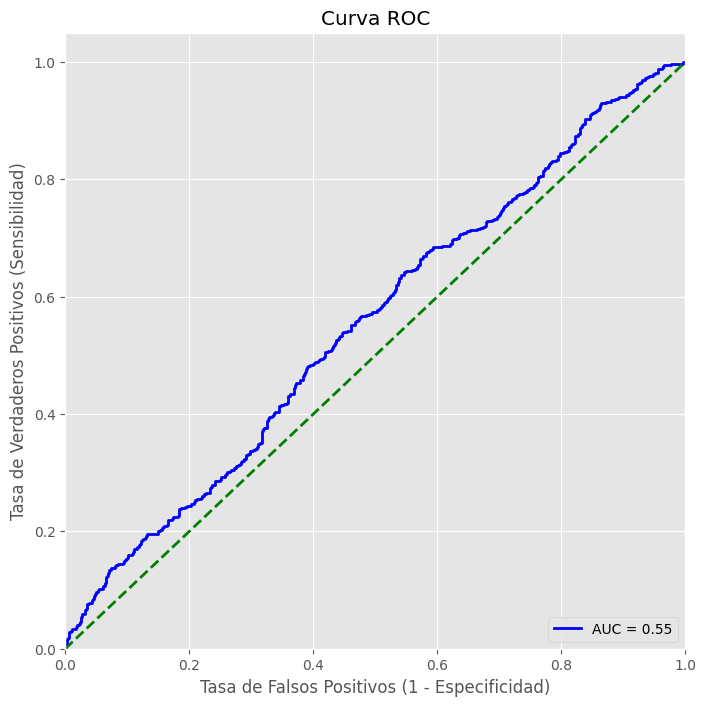

In [105]:
plt.figure(figsize=(8, 8))
plt.plot(fpr_lr, tpr_lr, color='blue', lw=2, label=f'AUC = {auc_roc_lr:.2f}')
plt.plot([0, 1], [0, 1], color='green', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos (1 - Especificidad)')
plt.ylabel('Tasa de Verdaderos Positivos (Sensibilidad)')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

# Comparación de Modelos

## Tabla de Resultados

In [173]:
resultados_final = {'Modelo': ['Neural Network','Logistic Regression'],
              'Accuracy': [accuracy_nn, accuracy_lr],
              'Precision': [precision_nn, precision_lr],
              'Recall': [recall_nn, recall_lr],
              'F1 Score': [f1_score_nn, f1_score_lr],
              'AUC-ROC': [auc_roc_nn, auc_roc_lr]}
resultados = pd.DataFrame(data=resultados_final)
print(resultados)

                Modelo  Accuracy  Precision    Recall  F1 Score   AUC-ROC
0       Neural Network  0.521320   0.512752  0.534266  0.523288  0.535521
1  Logistic Regression  0.543329   0.530106  0.627972  0.574904  0.554087


## Curvas ROC y AUC

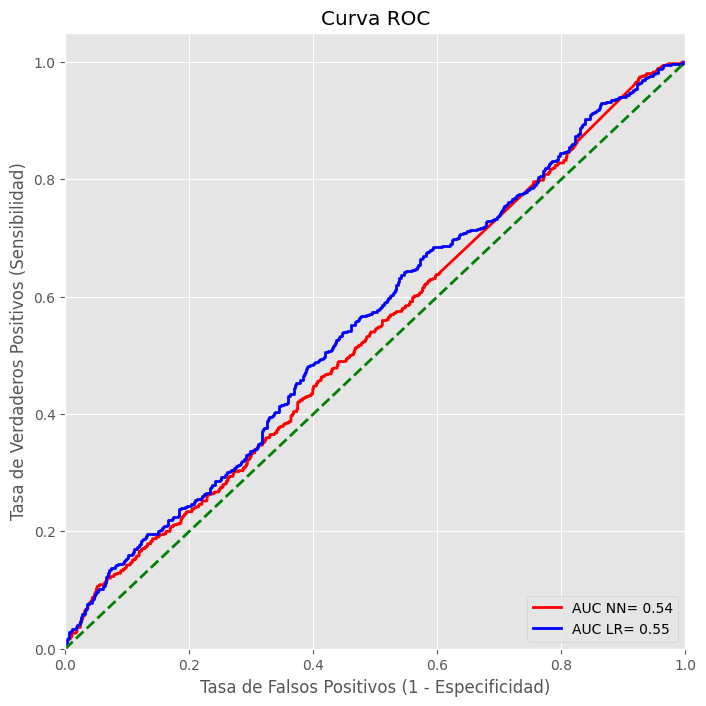

In [174]:
plt.figure(figsize=(8, 8))
plt.plot(fpr_nn, tpr_nn, color='red', lw=2, label=f'AUC NN= {auc_roc_nn:.2f}')
plt.plot(fpr_lr, tpr_lr, color='blue', lw=2, label=f'AUC LR= {auc_roc_lr:.2f}')
plt.plot([0, 1], [0, 1], color='green', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos (1 - Especificidad)')
plt.ylabel('Tasa de Verdaderos Positivos (Sensibilidad)')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

# Reducción de Multicolinealidad bajo criterio propuesto de correlación

## Correlación

<ipython-input-175-a562786f0b5f>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_corr.corr()


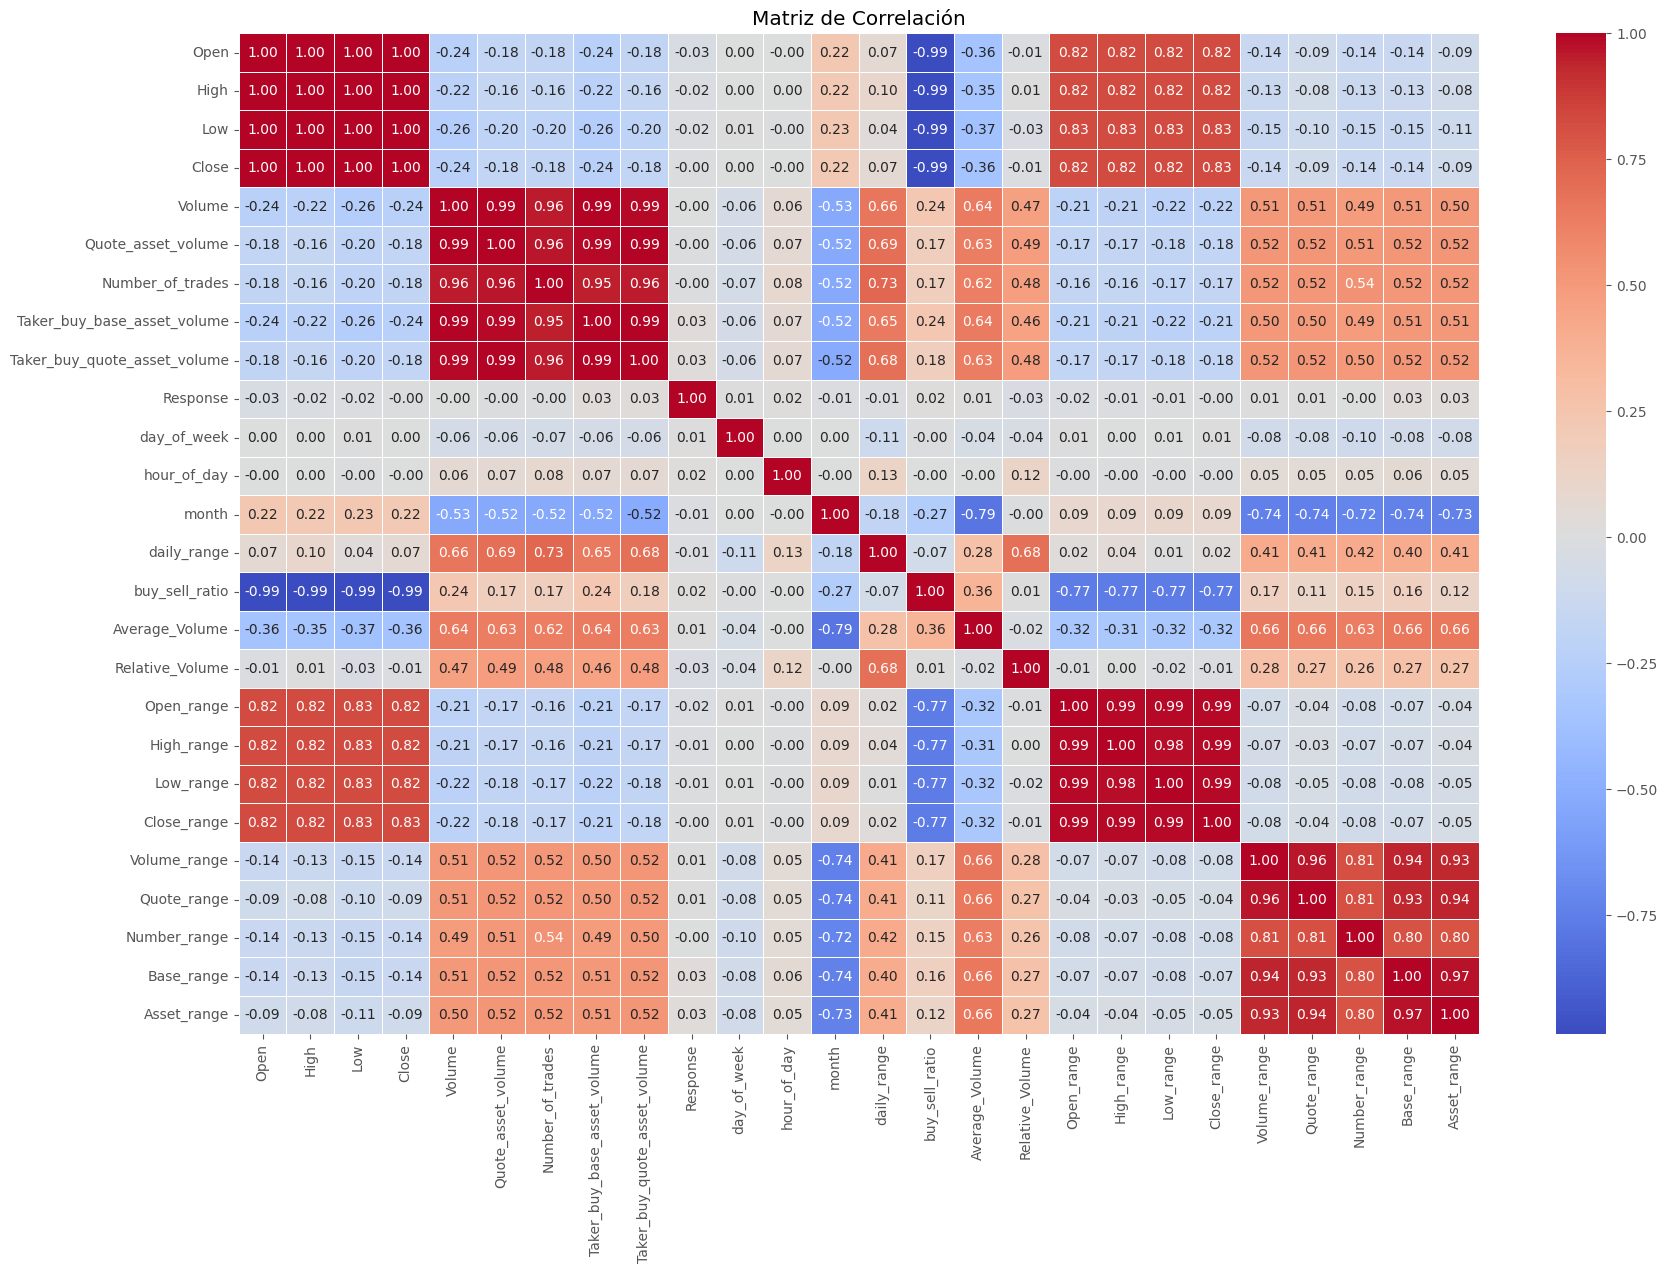

In [175]:
df_corr = df.drop('Ignore', axis = 1)
correlation_matrix = df_corr.corr()


sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matriz de Correlación')
plt.show()

Se eliminarán las siguientes variables:
- 'Open'
- 'High'
- 'Low'
- 'Quote_asset_volume'
- 'Number_of_trades'
- 'Taker_buy_base_asset_volume'
- 'Taker_buy_quote_asset_bolume'
- 'High_range'
- 'Low_range'
- 'Close_range'
- 'Quote_range'
- 'Number_range'
- 'Base_range'
- 'Asset_range'

Por la alta correlación que existe entre ellas, con el fin de eliminar la multicolinealidad y basándonos que existe una alta correlación por tener información similar. Con esto se espera simplificar el modelo, tener mayor interpretabilidad y no repetir información.

## Preprocesamiento

### División de Datos

In [176]:
X_2 = new_df.drop(['Response','Close_time','Ignore','Open','High','Low',
                   'Quote_asset_volume','Number_of_trades',
                   'Taker_buy_base_asset_volume',
                   'Taker_buy_quote_asset_volume','High_range', 'Low_range',
                   'Close_range','Quote_range','Number_range','Base_range','Asset_range'], axis=1)
y_2 = new_df['Response']

X_2_train, X_2_test, y_2_train, y_2_test = train_test_split(X_2, y_2, test_size = 0.2,random_state = 1)

In [178]:
feature_names = ['Close','Volume','day_of_week','hour_of_day','month','price_diff','daily_range','buy_sell_ratio','Average_volume','Relative_volume','Open_range','Volume_range']

### Escalado

In [179]:
min_max_scaler = preprocessing.MinMaxScaler()
X_2_minmax = min_max_scaler.fit_transform(X_2)
X_2_train_minmax = min_max_scaler.fit_transform(X_2_train)
X_2_test_minmax = min_max_scaler.fit_transform(X_2_test)

# Nuevo Modelo de Redes Neuronales

## Función del Modelo

In [180]:
def model_nn2():
  model = tf.keras.Sequential()
  model.add(Dense(12, input_dim=X_2_train_minmax.shape[1], activation='relu'))
  model.add(Dropout(0.3),)
  model.add(Dense(10, activation='relu'))
  model.add(Dropout(0.3),)
  model.add(Dense(8, activation='relu'))
  model.add(Dropout(0.3),)
  model.add(Dense(1, activation='sigmoid'))
  model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
  return model

## Modelo en Keras

In [181]:
nn2model = KerasClassifier(model = model_nn2)

## Espacio de Búsqueda de Hiperparámetros

In [ ]:
batchSize = [10, 50, 100]
epochs = [10, 30 ,50]
parameter_grid2 = dict(batch_size = batchSize, epochs=epochs)

In [ ]:
mygrid = GridSearchCV(estimator = nnmodel, param_grid = parameter_grid2, n_jobs = 1, cv = 3)
grid_result2 = mygrid.fit(X_std,y)

Epoch 1/10
485/485 [==============================] - 2s 2ms/step - loss: 0.7231 - accuracy: 0.4878
Epoch 2/10
485/485 [==============================] - 1s 2ms/step - loss: 0.6977 - accuracy: 0.5134
Epoch 3/10
485/485 [==============================] - 1s 2ms/step - loss: 0.6976 - accuracy: 0.5060
Epoch 4/10
485/485 [==============================] - 1s 2ms/step - loss: 0.6966 - accuracy: 0.5025
Epoch 5/10
485/485 [==============================] - 1s 2ms/step - loss: 0.6948 - accuracy: 0.5087
Epoch 6/10
485/485 [==============================] - 1s 2ms/step - loss: 0.6955 - accuracy: 0.4977
Epoch 7/10
485/485 [==============================] - 1s 2ms/step - loss: 0.6932 - accuracy: 0.5056
Epoch 8/10
485/485 [==============================] - 1s 3ms/step - loss: 0.6923 - accuracy: 0.5132
Epoch 9/10
485/485 [==============================] - 2s 5ms/step - loss: 0.6932 - accuracy: 0.5151
Epoch 10/10
243/243 [==============================] - 0s 1ms/step
Epoch 1/10
485/485 [=============

In [ ]:
print("Best: %f using %s" % (grid_result2.best_score_, grid_result2.best_params_))

Best: 0.512792 using {'batch_size': 100, 'epochs': 30}


In [ ]:
def model_nn2(optimizer='SGD'):
  model = tf.keras.Sequential()
  model.add(Dense(16, input_dim=X_2_train_minmax.shape[1], activation='relu'))
  model.add(Dropout(0.3),)
  model.add(Dense(8, activation='relu'))
  model.add(Dropout(0.3),)
  model.add(Dense(1, activation='sigmoid'))
  model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
  return model

In [ ]:
nn2model = KerasClassifier(model = model_nn2, batch_size = 100, epochs = 30)

In [ ]:
optimizer = ['SGD','Adam', 'Adadelta']
param2 = dict(optimizer=optimizer)

In [ ]:
grid2 = GridSearchCV(estimator = nn2model, param_grid=param2, n_jobs=-1, cv=3)
grid_result3 = grid2.fit(X_std,y)

ValueError: 
All the 9 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py", line 1491, in fit
    super().fit(X=X, y=y, sample_weight=sample_weight, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py", line 760, in fit
    self._fit(
  File "/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py", line 928, in _fit
    self._fit_keras_model(
  File "/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py", line 524, in _fit_keras_model
    hist = self.model_.fit(x=X, y=y, **fit_args)
  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/tmp/__autograph_generated_file82e84tsy.py", line 15, in tf__train_function
    retval_ = ag__.converted_call(ag__.ld(step_function), (ag__.ld(self), ag__.ld(iterator)), None, fscope)
ValueError: in user code:

    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1401, in train_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1384, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1373, in run_step  **
        outputs = model.train_step(data)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1150, in train_step
        y_pred = self(x, training=True)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_4" is incompatible with the layer: expected shape=(None, 9), found shape=(None, 16)


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py", line 1491, in fit
    super().fit(X=X, y=y, sample_weight=sample_weight, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py", line 760, in fit
    self._fit(
  File "/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py", line 928, in _fit
    self._fit_keras_model(
  File "/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py", line 524, in _fit_keras_model
    hist = self.model_.fit(x=X, y=y, **fit_args)
  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/tmp/__autograph_generated_file2ezjkn3b.py", line 15, in tf__train_function
    retval_ = ag__.converted_call(ag__.ld(step_function), (ag__.ld(self), ag__.ld(iterator)), None, fscope)
ValueError: in user code:

    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1401, in train_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1384, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1373, in run_step  **
        outputs = model.train_step(data)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1150, in train_step
        y_pred = self(x, training=True)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_5" is incompatible with the layer: expected shape=(None, 9), found shape=(None, 16)


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py", line 1491, in fit
    super().fit(X=X, y=y, sample_weight=sample_weight, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py", line 760, in fit
    self._fit(
  File "/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py", line 928, in _fit
    self._fit_keras_model(
  File "/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py", line 524, in _fit_keras_model
    hist = self.model_.fit(x=X, y=y, **fit_args)
  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/tmp/__autograph_generated_file82e84tsy.py", line 15, in tf__train_function
    retval_ = ag__.converted_call(ag__.ld(step_function), (ag__.ld(self), ag__.ld(iterator)), None, fscope)
ValueError: in user code:

    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1401, in train_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1384, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1373, in run_step  **
        outputs = model.train_step(data)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1150, in train_step
        y_pred = self(x, training=True)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_5" is incompatible with the layer: expected shape=(None, 9), found shape=(None, 16)


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py", line 1491, in fit
    super().fit(X=X, y=y, sample_weight=sample_weight, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py", line 760, in fit
    self._fit(
  File "/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py", line 928, in _fit
    self._fit_keras_model(
  File "/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py", line 524, in _fit_keras_model
    hist = self.model_.fit(x=X, y=y, **fit_args)
  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/tmp/__autograph_generated_file2ezjkn3b.py", line 15, in tf__train_function
    retval_ = ag__.converted_call(ag__.ld(step_function), (ag__.ld(self), ag__.ld(iterator)), None, fscope)
ValueError: in user code:

    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1401, in train_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1384, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1373, in run_step  **
        outputs = model.train_step(data)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1150, in train_step
        y_pred = self(x, training=True)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_6" is incompatible with the layer: expected shape=(None, 9), found shape=(None, 16)


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py", line 1491, in fit
    super().fit(X=X, y=y, sample_weight=sample_weight, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py", line 760, in fit
    self._fit(
  File "/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py", line 928, in _fit
    self._fit_keras_model(
  File "/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py", line 524, in _fit_keras_model
    hist = self.model_.fit(x=X, y=y, **fit_args)
  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/tmp/__autograph_generated_file82e84tsy.py", line 15, in tf__train_function
    retval_ = ag__.converted_call(ag__.ld(step_function), (ag__.ld(self), ag__.ld(iterator)), None, fscope)
ValueError: in user code:

    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1401, in train_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1384, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1373, in run_step  **
        outputs = model.train_step(data)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1150, in train_step
        y_pred = self(x, training=True)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_6" is incompatible with the layer: expected shape=(None, 9), found shape=(None, 16)


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py", line 1491, in fit
    super().fit(X=X, y=y, sample_weight=sample_weight, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py", line 760, in fit
    self._fit(
  File "/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py", line 928, in _fit
    self._fit_keras_model(
  File "/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py", line 524, in _fit_keras_model
    hist = self.model_.fit(x=X, y=y, **fit_args)
  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/tmp/__autograph_generated_file2ezjkn3b.py", line 15, in tf__train_function
    retval_ = ag__.converted_call(ag__.ld(step_function), (ag__.ld(self), ag__.ld(iterator)), None, fscope)
ValueError: in user code:

    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1401, in train_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1384, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1373, in run_step  **
        outputs = model.train_step(data)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1150, in train_step
        y_pred = self(x, training=True)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_7" is incompatible with the layer: expected shape=(None, 9), found shape=(None, 16)


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py", line 1491, in fit
    super().fit(X=X, y=y, sample_weight=sample_weight, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py", line 760, in fit
    self._fit(
  File "/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py", line 928, in _fit
    self._fit_keras_model(
  File "/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py", line 524, in _fit_keras_model
    hist = self.model_.fit(x=X, y=y, **fit_args)
  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/tmp/__autograph_generated_file82e84tsy.py", line 15, in tf__train_function
    retval_ = ag__.converted_call(ag__.ld(step_function), (ag__.ld(self), ag__.ld(iterator)), None, fscope)
ValueError: in user code:

    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1401, in train_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1384, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1373, in run_step  **
        outputs = model.train_step(data)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1150, in train_step
        y_pred = self(x, training=True)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_7" is incompatible with the layer: expected shape=(None, 9), found shape=(None, 16)


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py", line 1491, in fit
    super().fit(X=X, y=y, sample_weight=sample_weight, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py", line 760, in fit
    self._fit(
  File "/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py", line 928, in _fit
    self._fit_keras_model(
  File "/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py", line 524, in _fit_keras_model
    hist = self.model_.fit(x=X, y=y, **fit_args)
  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/tmp/__autograph_generated_file2ezjkn3b.py", line 15, in tf__train_function
    retval_ = ag__.converted_call(ag__.ld(step_function), (ag__.ld(self), ag__.ld(iterator)), None, fscope)
ValueError: in user code:

    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1401, in train_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1384, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1373, in run_step  **
        outputs = model.train_step(data)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1150, in train_step
        y_pred = self(x, training=True)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_8" is incompatible with the layer: expected shape=(None, 9), found shape=(None, 16)


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py", line 1491, in fit
    super().fit(X=X, y=y, sample_weight=sample_weight, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py", line 760, in fit
    self._fit(
  File "/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py", line 928, in _fit
    self._fit_keras_model(
  File "/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py", line 524, in _fit_keras_model
    hist = self.model_.fit(x=X, y=y, **fit_args)
  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/tmp/__autograph_generated_file82e84tsy.py", line 15, in tf__train_function
    retval_ = ag__.converted_call(ag__.ld(step_function), (ag__.ld(self), ag__.ld(iterator)), None, fscope)
ValueError: in user code:

    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1401, in train_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1384, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1373, in run_step  **
        outputs = model.train_step(data)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1150, in train_step
        y_pred = self(x, training=True)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_8" is incompatible with the layer: expected shape=(None, 9), found shape=(None, 16)



In [ ]:
print("Best: %f using %s" % (grid_result3.best_score_, grid_result3.best_params_))

Best: 0.989578 using {'optimizer': 'SGD'}


## Modelo Final

In [182]:
def model_nnn2():
  model = tf.keras.Sequential()
  model.add(Dense(12, input_dim=X_2_train_minmax.shape[1], activation='relu'))
  model.add(Dropout(0.3),)
  model.add(Dense(10, activation='relu'))
  model.add(Dropout(0.3),)
  model.add(Dense(8, activation='relu'))
  model.add(Dropout(0.3),)
  model.add(Dense(1, activation='sigmoid'))
  model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])
  return model

In [183]:
nnn2model = KerasClassifier(model = model_nnn2, batch_size = 100, epochs = 30)

In [184]:
nnn2model.fit(X_2_train_minmax,y_train)

Epoch 1/30
59/59 [==============================] - 1s 3ms/step - loss: 0.7021 - accuracy: 0.4923
Epoch 2/30
59/59 [==============================] - 0s 3ms/step - loss: 0.6951 - accuracy: 0.4945
Epoch 3/30
59/59 [==============================] - 0s 3ms/step - loss: 0.6936 - accuracy: 0.5043
Epoch 4/30
59/59 [==============================] - 0s 3ms/step - loss: 0.6934 - accuracy: 0.5062
Epoch 5/30
59/59 [==============================] - 0s 4ms/step - loss: 0.6925 - accuracy: 0.5115
Epoch 6/30
59/59 [==============================] - 0s 3ms/step - loss: 0.6929 - accuracy: 0.5045
Epoch 7/30
59/59 [==============================] - 0s 3ms/step - loss: 0.6936 - accuracy: 0.5015
Epoch 8/30
59/59 [==============================] - 0s 3ms/step - loss: 0.6935 - accuracy: 0.4993
Epoch 9/30
59/59 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.5019
Epoch 10/30
59/59 [==============================] - 0s 3ms/step - loss: 0.6932 - accuracy: 0.5043
Epoch 11/30
59/59 [

KerasClassifier(
	model=<function model_nnn2 at 0x7b28545d03a0>
	build_fn=None
	warm_start=False
	random_state=None
	optimizer=rmsprop
	loss=None
	metrics=None
	batch_size=100
	validation_batch_size=None
	verbose=1
	callbacks=None
	validation_split=0.0
	shuffle=True
	run_eagerly=False
	epochs=30
	class_weight=None
)

## Predicción

In [185]:
y_pred2 = nnn2model.predict(X_2_test_minmax)

15/15 [==============================] - 0s 2ms/step


In [186]:
print('Accuracy of neural network classifier on train set: {:.2f}'.format(nnn2model.score(X_2_train_minmax, y_train)))

59/59 [==============================] - 0s 1ms/step
Accuracy of neural network classifier on train set: 0.51


In [187]:
print('Accuracy of neural network classifier on test set: {:.2f}'.format(nnn2model.score(X_2_test_minmax, y_test)))

15/15 [==============================] - 0s 2ms/step
Accuracy of neural network classifier on test set: 0.49


In [188]:
print('Precision of neural network classifier on test set: {:.2f}'.format(precision_score(y_test, y_pred2)))

Precision of neural network classifier on test set: 0.49


### Métricas

In [189]:
accuracy_nn2 = accuracy_score(y_test, y_pred2)
precision_nn2 = precision_score(y_test, y_pred2)
recall_nn2 = recall_score(y_test, y_pred2)
f1_score_nn2 = f1_score(y_test, y_pred2)
conf_matrix2 = confusion_matrix(y_test, y_pred2)
print(accuracy_nn2, precision_nn2, recall_nn2, f1_score_nn2, conf_matrix2)

0.4938101788170564 0.48891235480464623 0.6475524475524476 0.5571600481347774 [[255 484]
 [252 463]]


In [190]:
y_scores2 = nnn2model.predict_proba(X_2_test_minmax)[:, 1]

15/15 [==============================] - 0s 1ms/step


In [191]:
fpr_nn2, tpr_nn2, thresholds_nn2 = roc_curve(y_test, y_scores2)
auc_roc_nn2 = roc_auc_score(y_test, y_scores2)

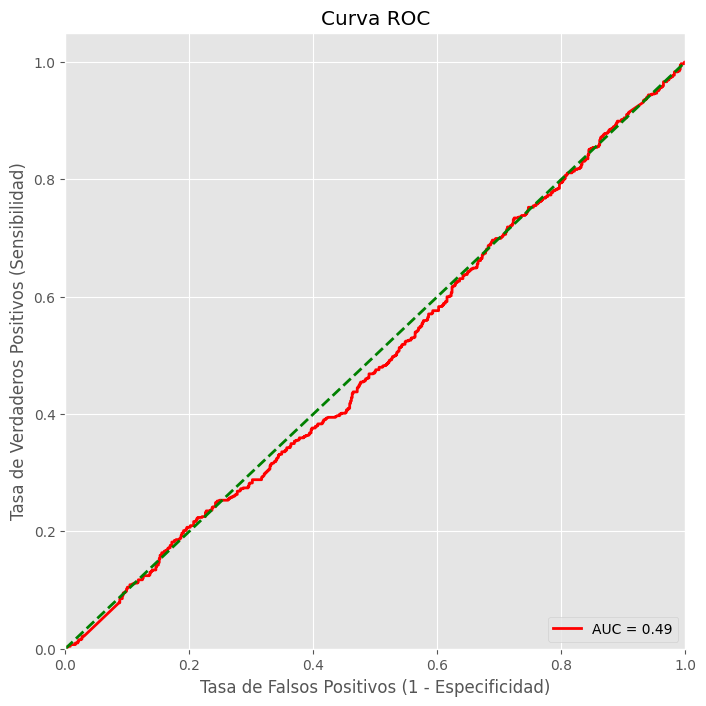

In [192]:
plt.figure(figsize=(8, 8))
plt.plot(fpr_nn2, tpr_nn2, color='red', lw=2, label=f'AUC = {auc_roc_nn2:.2f}')
plt.plot([0, 1], [0, 1], color='green', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos (1 - Especificidad)')
plt.ylabel('Tasa de Verdaderos Positivos (Sensibilidad)')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

# Nuevo Modelo de Regresión Logística

## Modelo en SKLearn

In [193]:
lrmodel2 = LogisticRegression()

## Definición de Hiperparámetros

In [194]:
solvers = ['newton-cg','liblinear','lbfgs']
penalty = ['l2','l1', 'elasticnet']
c_values = [100, 10, 1.0, 0.1, 0.01]

## Espacio de Búsqueda de Hiperparámetros

In [195]:
grid2 = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=5, random_state=1)
grid_search2 = GridSearchCV(estimator=lrmodel, param_grid=grid2, n_jobs=-1, cv=3, scoring='accuracy',error_score=0)
grid_result2 = grid_search2.fit(X_std, y)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
75 fits failed out of a total of 135.
The score on these train-test partitions for these parameters will be set to 0.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Solver

In [196]:
print("Best: %f using %s" % (grid_result2.best_score_, grid_result2.best_params_))
means = grid_result2.cv_results_['mean_test_score']
stds = grid_result2.cv_results_['std_test_score']
params = grid_result2.cv_results_['params']

Best: 0.986244 using {'C': 1.0, 'penalty': 'l1', 'solver': 'liblinear'}


## Modelo Final

In [197]:
logreg2 = LogisticRegression(solver = 'liblinear', penalty='l2', C=1.0)
logreg2.fit(X_2_train_minmax, y_train)

LogisticRegression(solver='liblinear')

## Predicción

In [198]:
y_pred_lr2 = logreg2.predict(X_2_test_minmax)

In [199]:
print('Accuracy of logistic regression classifier on train set: {:.2f}'.format(logreg2.score(X_2_train_minmax, y_train)))

Accuracy of logistic regression classifier on train set: 0.54


In [200]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg2.score(X_2_test_minmax, y_test)))

Accuracy of logistic regression classifier on test set: 0.52


In [201]:
print('Precision of logistic regression classifier on test set: {:.2f}'.format(precision_score(y_test, y_pred_lr2)))

Precision of logistic regression classifier on test set: 0.52


### Métricas

In [202]:
accuracy_lr2 = accuracy_score(y_test, y_pred_lr2)
precision_lr2 = precision_score(y_test, y_pred_lr2)
recall_lr2 = recall_score(y_test, y_pred_lr2)
f1_score_lr2 = f1_score(y_test, y_pred_lr2)
conf_matrix2 = confusion_matrix(y_test, y_pred_lr)
print(accuracy_lr2, precision_lr2, recall_lr2, f1_score_lr2, conf_matrix2)

0.5226960110041265 0.5175292153589316 0.43356643356643354 0.4718417047184171 [[341 398]
 [266 449]]


In [203]:
y_scores_lr2 = logreg2.predict_proba(X_2_test_minmax)[:, 1]

In [204]:
fpr_lr2, tpr_lr2, thresholds_lr2 = roc_curve(y_test, y_scores_lr2)
auc_roc_lr2 = roc_auc_score(y_test, y_scores_lr2)

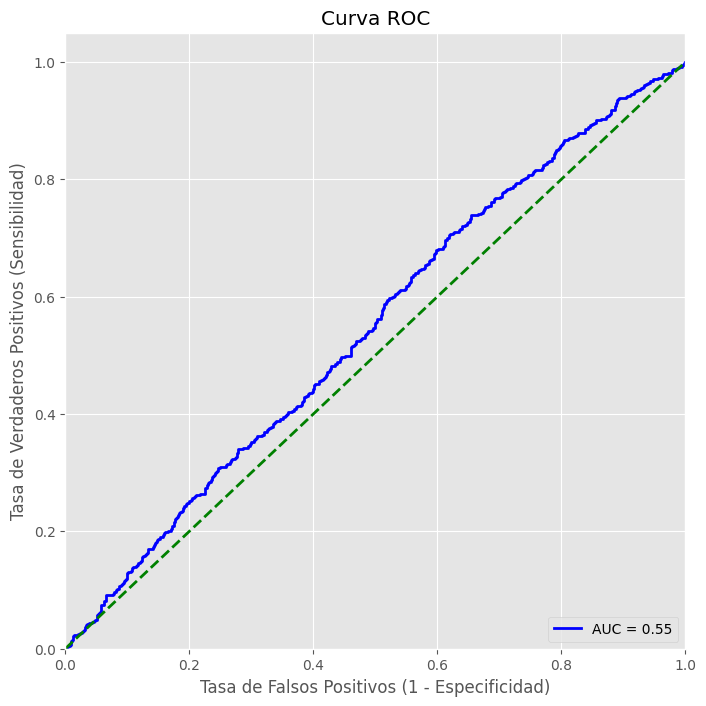

In [205]:
plt.figure(figsize=(8, 8))
plt.plot(fpr_lr2, tpr_lr2, color='blue', lw=2, label=f'AUC = {auc_roc_lr2:.2f}')
plt.plot([0, 1], [0, 1], color='green', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos (1 - Especificidad)')
plt.ylabel('Tasa de Verdaderos Positivos (Sensibilidad)')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

# Nueva Comparación de Resultados

## Nueva Tabla de Resultados

In [206]:
resultados_final2 = {'Modelo': ['Neural Network V2','Logistic Regression V2'],
              'Accuracy': [accuracy_nn2, accuracy_lr2],
              'Precision': [precision_nn2, precision_lr2],
              'Recall': [recall_nn2, recall_lr2],
              'F1 Score': [f1_score_nn2, f1_score_lr2],
              'AUC-ROC': [auc_roc_nn2, auc_roc_lr2]}
resulta2 = pd.DataFrame(data=resultados_final2)
print(resulta2)

                   Modelo  Accuracy  Precision    Recall  F1 Score   AUC-ROC
0       Neural Network V2  0.493810   0.488912  0.647552  0.557160  0.490039
1  Logistic Regression V2  0.522696   0.517529  0.433566  0.471842  0.545648


## Nuevas Curvas ROC y AUC

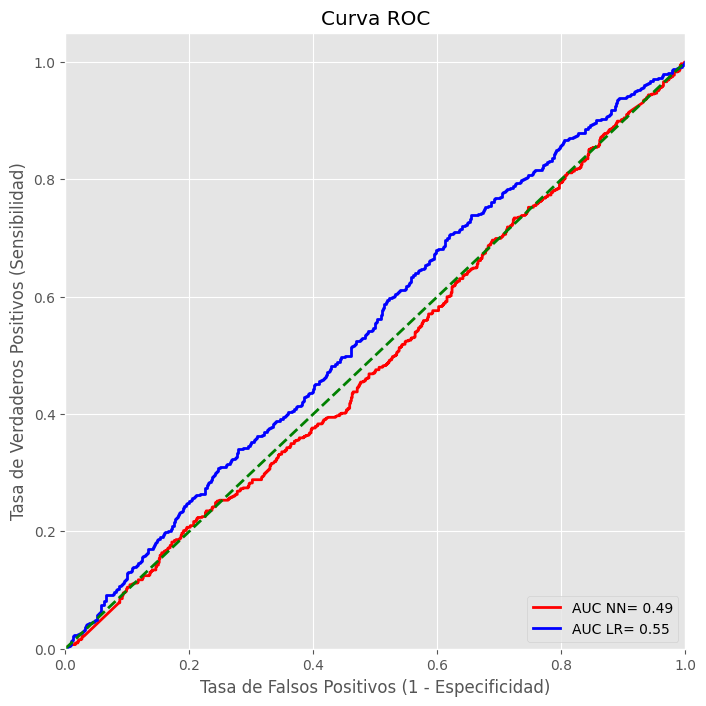

In [207]:
plt.figure(figsize=(8, 8))
plt.plot(fpr_nn2, tpr_nn2, color='red', lw=2, label=f'AUC NN= {auc_roc_nn2:.2f}')
plt.plot(fpr_lr2, tpr_lr2, color='blue', lw=2, label=f'AUC LR= {auc_roc_lr2:.2f}')
plt.plot([0, 1], [0, 1], color='green', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos (1 - Especificidad)')
plt.ylabel('Tasa de Verdaderos Positivos (Sensibilidad)')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

# Importancia de los Predictores

## Importancia por Permutación

In [208]:
perm_importance = permutation_importance(nnn2model, X_2_test_minmax, y_test)

15/15 [==============================] - 0s 2ms/step


In [209]:
importances = perm_importance.importances_mean
std_devs = perm_importance.importances_std

In [210]:
feature_importance_nn = pd.DataFrame({'Feature':feature_names, 'Importance': importances, 'Std Dev': std_devs})

ValueError: All arrays must be of the same length

In [211]:
print(feature_importance_nn.sort_values(by='Importance', ascending=False))

NameError: name 'feature_importance_nn' is not defined

# Importación de Nuevos Datos

In [212]:
df2 = pd.read_excel(ruta+"datos_klines_newtest.xlsx")

In [213]:
df2.columns = ['Open_time','Open','High','Low','Close',
                'Volume','Close_time','Quote_asset_volume',
                'Number_of_trades','Taker_buy_base_asset_volume',
                'Taker_buy_quote_asset_volume','Ignore','Response']

# Conversión Unix

In [214]:
df2['Open_time'] = pd.to_datetime(df2['Open_time'], unit='ms', origin='unix')
df2['Close_time'] = pd.to_datetime(df2['Close_time'], unit='ms',origin='unix')

# Características

In [215]:
df2.set_index('Open_time', inplace = True)

In [216]:
df2['day_of_week'] = df2.index.dayofweek

In [217]:
df2['hour_of_day'] = df2.index.hour

In [218]:
df2['month'] = df2.index.month

In [219]:
df2['daily_range'] = df2['High'] - df2['Low']

In [220]:
df2['buy_sell_ratio'] = df2['Taker_buy_base_asset_volume'] / df2['Taker_buy_quote_asset_volume']

In [221]:
df2['price_diff'] = df2['Close'].diff()

# Preprocesamiento

In [222]:
missing_values_count2 = df2.isnull().sum()
print(missing_values_count2)
np.shape(df2)

Open                            0
High                            0
Low                             0
Close                           0
Volume                          0
Close_time                      0
Quote_asset_volume              0
Number_of_trades                0
Taker_buy_base_asset_volume     0
Taker_buy_quote_asset_volume    0
Ignore                          0
Response                        0
day_of_week                     0
hour_of_day                     0
month                           0
daily_range                     0
buy_sell_ratio                  0
price_diff                      1
dtype: int64


(719, 18)

In [223]:
new_df2 = df2.dropna()

In [224]:
X2 = new_df2.drop(['Response','Close_time','Ignore'], axis=1)
y2 = new_df2['Response']

# Escalado

In [225]:
X_newstd = StandardScaler().fit_transform(X2)

# PCA

In [226]:
X_newstd_pca = pca.fit_transform(X_newstd)

# Nueva Predicción

In [227]:
y_newpred = nnnnnmodel.predict(X_newstd_pca)

8/8 [==============================] - 0s 3ms/step


In [228]:
accuracy_nn3 = accuracy_score(y2, y_newpred)
precision_nn3 = precision_score(y2, y_newpred)
recall_nn3 = recall_score(y2, y_newpred)
f1_score_nn3 = f1_score(y2, y_newpred)
conf_matrix3 = confusion_matrix(y2, y_newpred)
print(accuracy_nn3, precision_nn3, recall_nn3, f1_score_nn3, conf_matrix3)

0.4596100278551532 0.4808743169398907 0.47058823529411764 0.47567567567567565 [[154 190]
 [198 176]]


In [229]:
y_scores2 = nnnnnmodel.predict_proba(X_newstd_pca)[:, 1]

8/8 [==============================] - 0s 3ms/step


In [230]:
fpr_nn3, tpr_nn3, thresholds_nn3 = roc_curve(y2, y_scores2)
auc_roc_nn3 = roc_auc_score(y2, y_scores2)

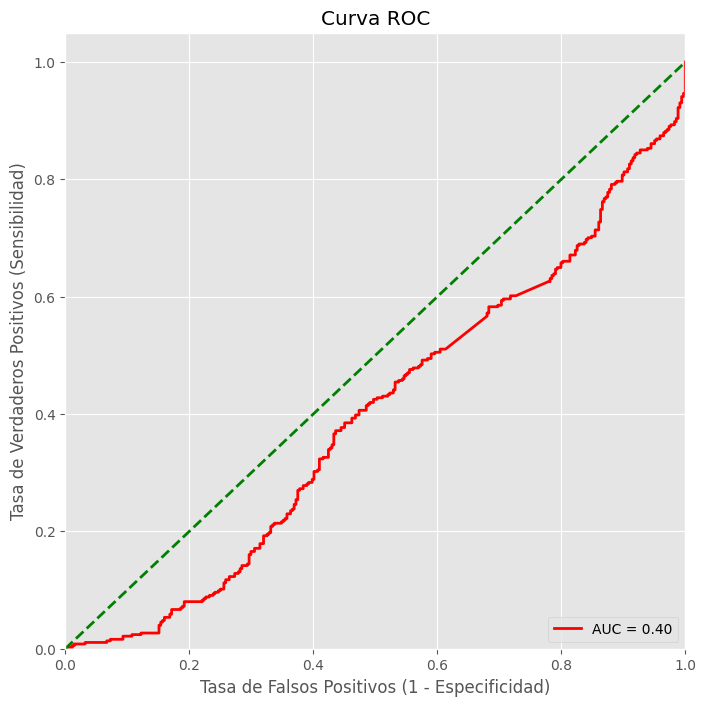

In [231]:
plt.figure(figsize=(8, 8))
plt.plot(fpr_nn3, tpr_nn3, color='red', lw=2, label=f'AUC = {auc_roc_nn3:.2f}')
plt.plot([0, 1], [0, 1], color='green', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos (1 - Especificidad)')
plt.ylabel('Tasa de Verdaderos Positivos (Sensibilidad)')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()